In [ ]:
install.packages("glue")
library(glue)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
rm(list = ls())

# Лабораторная работа 8. Анализ одноканальной системы массового обслуживания с учетом приоритета заявок

## Задание 1.

В автоматизированной системе управления технологическим процессом (АСУТП) обрабатываются сообщения трех типов (сообщения A,B,C), поступающие от производственного оборудования. Сообщения типа A поступают в среднем через каждые $t_1$ секунды. Сообщения типа B поступают в среднем через $t_2$ секунд, сообщения типа C – через $t_3$ c. Обработка одного сообщения типа A занимает в среднем $t_4$ мс, сообщения типа B – $t_5$ мс, сообщения типа C – $t_6$ мс. Интервалы времени между сообщениями и время обработки сообщений можно считать случайными величинами, распределенными по экспоненциальному закону. Под каждое сообщение имеется очередь в $m_A, m_B, m_C$ мест.

Предлагаются два варианта дисциплины обслуживания сообщений: а) с относительными приоритетами; б) с абсолютными приоритетами (возобновление обслуживания). При обслуживании с приоритетами более высокий приоритет должны иметь сообщения, требующие меньшего среднего времени обработки.

Требуется выбрать дисциплину обслуживания, обеспечивающую минимальное среднее время обработки всех сообщений (выполнить теоретический расчет и экспериментальный расчет).

In [ ]:
Variant<-13
set.seed(Variant+535)
t<-rexp(3, 0.5)
tt<-rexp(3,0.05)
ma<-sample(c(1,2,3),1)
mb<-sample(c(1,2,3),1)
mc<-sample(c(1,2,3),1)
D <- data.frame(t[1],t[2],t[3],tt[1],tt[2],tt[3], ma, mb, mc)
colnames(D)<-c('t1','t2','t3','t4','t5','t6', 'ma', 'mb', 'mc')
View(D)

t1       t2       t3        t4      t5       t6      ma mb mc
1 1.674042 2.116317 0.2138339 47.8907 34.70006 17.9695 3  1  1

In [ ]:
ma <- 1
mb <- 1
mc <- 1

### Теоретически (общее)

Все время измеряется в секундах.

$t_A = t_4$, $t_B = t_5$, $t_C = t_6$

$t_C < t_A < t_B \Rightarrow P_C > P_A > P_B$  
$P_p$ - приоритет заявки типа $p$.

$\lambda_p = \lambda_{A, B, C} = \frac{1}{t_{A, B, C}}$

$\mu_p = \mu_{A, B, C} = \frac{1000}{t_{A, B, C}}$

$m_p = m_{A, B, C}$ - длины очередей заявок типа $p$.

In [ ]:
λ_p <- 1 / t
μ_p <- 1000 / tt
m_p <- c(ma, mb, mc)
View(data.frame(λ_p, μ_p, m_p))

λ_p       μ_p      m_p
1 0.5973566 20.88088 1  
2 0.4725190 28.81840 1  
3 4.6765264 55.64986 1

Введём условные обозначения: префикс $X$ относится к заявкам с наивысшим приоритетом, $Y$ - к заявкам со средним приоритетом, $Z$ - к заявкам с низшим приоритетом, т.е.

$$P_x > P_y > P_z$$
$$X \equiv C \rightarrow \lambda_x = \lambda_C, \mu_x = \mu_C, m_x = m_C$$
$$Y \equiv A \rightarrow \lambda_y = \lambda_A, \mu_y = \mu_A, m_y = m_A$$
$$Z \equiv B \rightarrow \lambda_z = \lambda_B, \mu_z = \mu_B, m_z = m_B$$

In [ ]:
μ_p_order <- order(μ_p)

X <- which(μ_p_order == 3)
Y <- which(μ_p_order == 2)
Z <- which(μ_p_order == 1)

λ_x <- λ_p[X]
λ_y <- λ_p[Y]
λ_z <- λ_p[Z]

μ_x <- μ_p[X]
μ_y <- μ_p[Y]
μ_z <- μ_p[Z]

m_x <- m_p[X]
m_y <- m_p[Y]
m_z <- m_p[Z]

View(data.frame(c(X, Y, Z), c(λ_x, λ_y, λ_z), c(μ_x, μ_y, μ_z), c(m_x, m_y, m_z)))

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1

Также обозначим $M_x = m_x + 1$ - количество состояний заявок типа $X$ (по одному состоянию на каждое количество заявок в очереди и + ещё одно состояние когда очередь пуста). Аналогично $M_y$ и $M_z$.

$$M_x = m_x + 1 = 3 + 1 = 4$$
$$M_y = m_y + 1 = 3 + 1 = 4$$
$$M_z = m_z + 1 = 2 + 1 = 3$$

In [ ]:
M_x <- m_x + 1
M_y <- m_y + 1
M_z <- m_z + 1

initial_state <- data.frame(c(X, Y, Z), c(λ_x, λ_y, λ_z), c(μ_x, μ_y, μ_z), c(m_x, m_y, m_z), c(M_x, M_y, M_z))
View(initial_state)

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1               
  c.M_x..M_y..M_z.
1 2               
2 2               
3 2

### Теоретически (абсолютный приоритет)

Составим граф состояний. Он будет представлять собой трёхмерный куб, со сторонами $(m_x, m_y, m_z) = (3, 4, 4)$. Всего будет 64 состояния.

Состояние $S_{Kxyz}$ означает, что сейчас обрабатывается заявка типа $K$. Если $K = 0$, значит никакая заявка не обрабатывается. $x, y, z$ - количество заявок соответствующих типов в системе.  
Пример: состояние $S_{X302}$ означает, что сейчас обрабатывается заявка типа $X$, в очереди находится 3 заявки типа $X$ и 2 заявки типа $Z$.

Тип заявки $K$ в состоянии $S_{Kxyz}$ определяется следующим образом:

$$K(x, y, z) = \begin{cases} X, x > 0 \\ Y, x = 0 \wedge y > 0 \\ Z, x = 0 \wedge y = 0 \wedge z > 0 \\ 0, x = y = z = 0 \end{cases}$$

#### Граф состояний:

Красным цветом отмечены $\color{red}{\lambda_x, \mu_x}$ сплошными и штрихованными линиями соответственно.  
Аналогично отмечены $\color{green}{\lambda_y, \mu_y}$ и $\color{blue}{\lambda_z, \mu_z}$.

In [ ]:
View(initial_state)

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1               
  c.M_x..M_y..M_z.
1 2               
2 2               
3 2

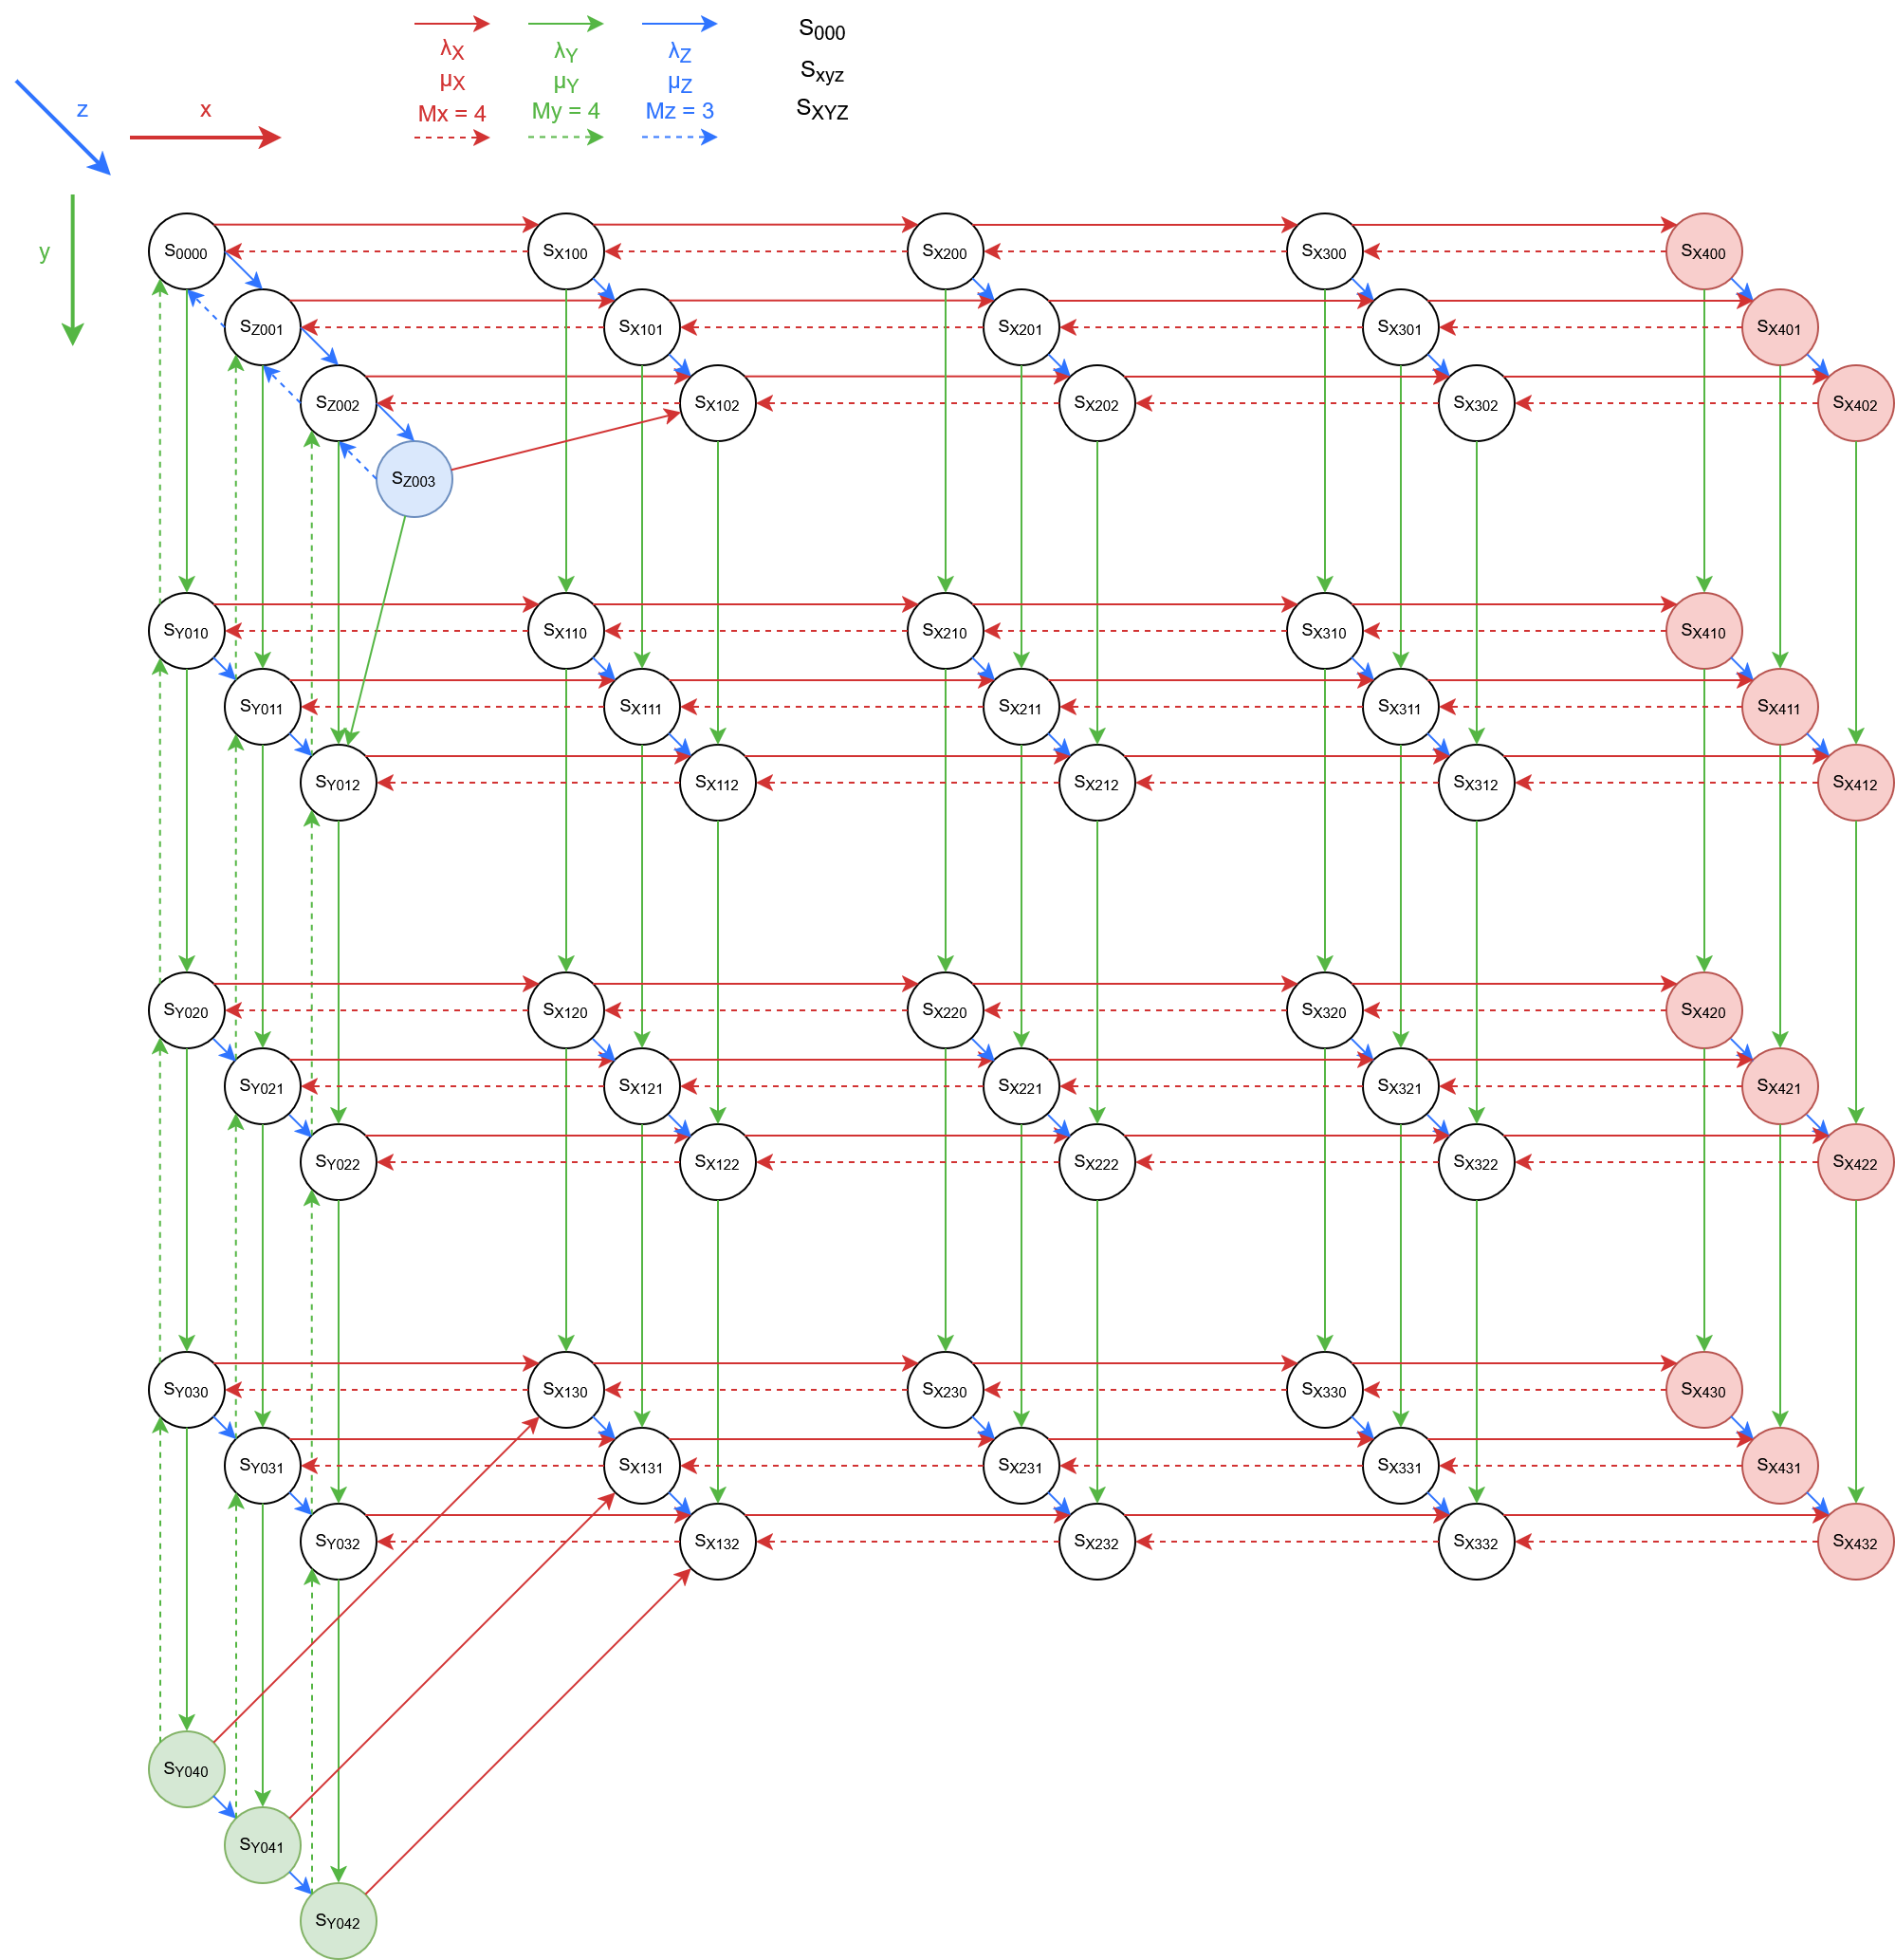

#### Граф состояний с зонами одинаковой логики потоков

In [ ]:
View(initial_state)

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1               
  c.M_x..M_y..M_z.
1 2               
2 2               
3 2

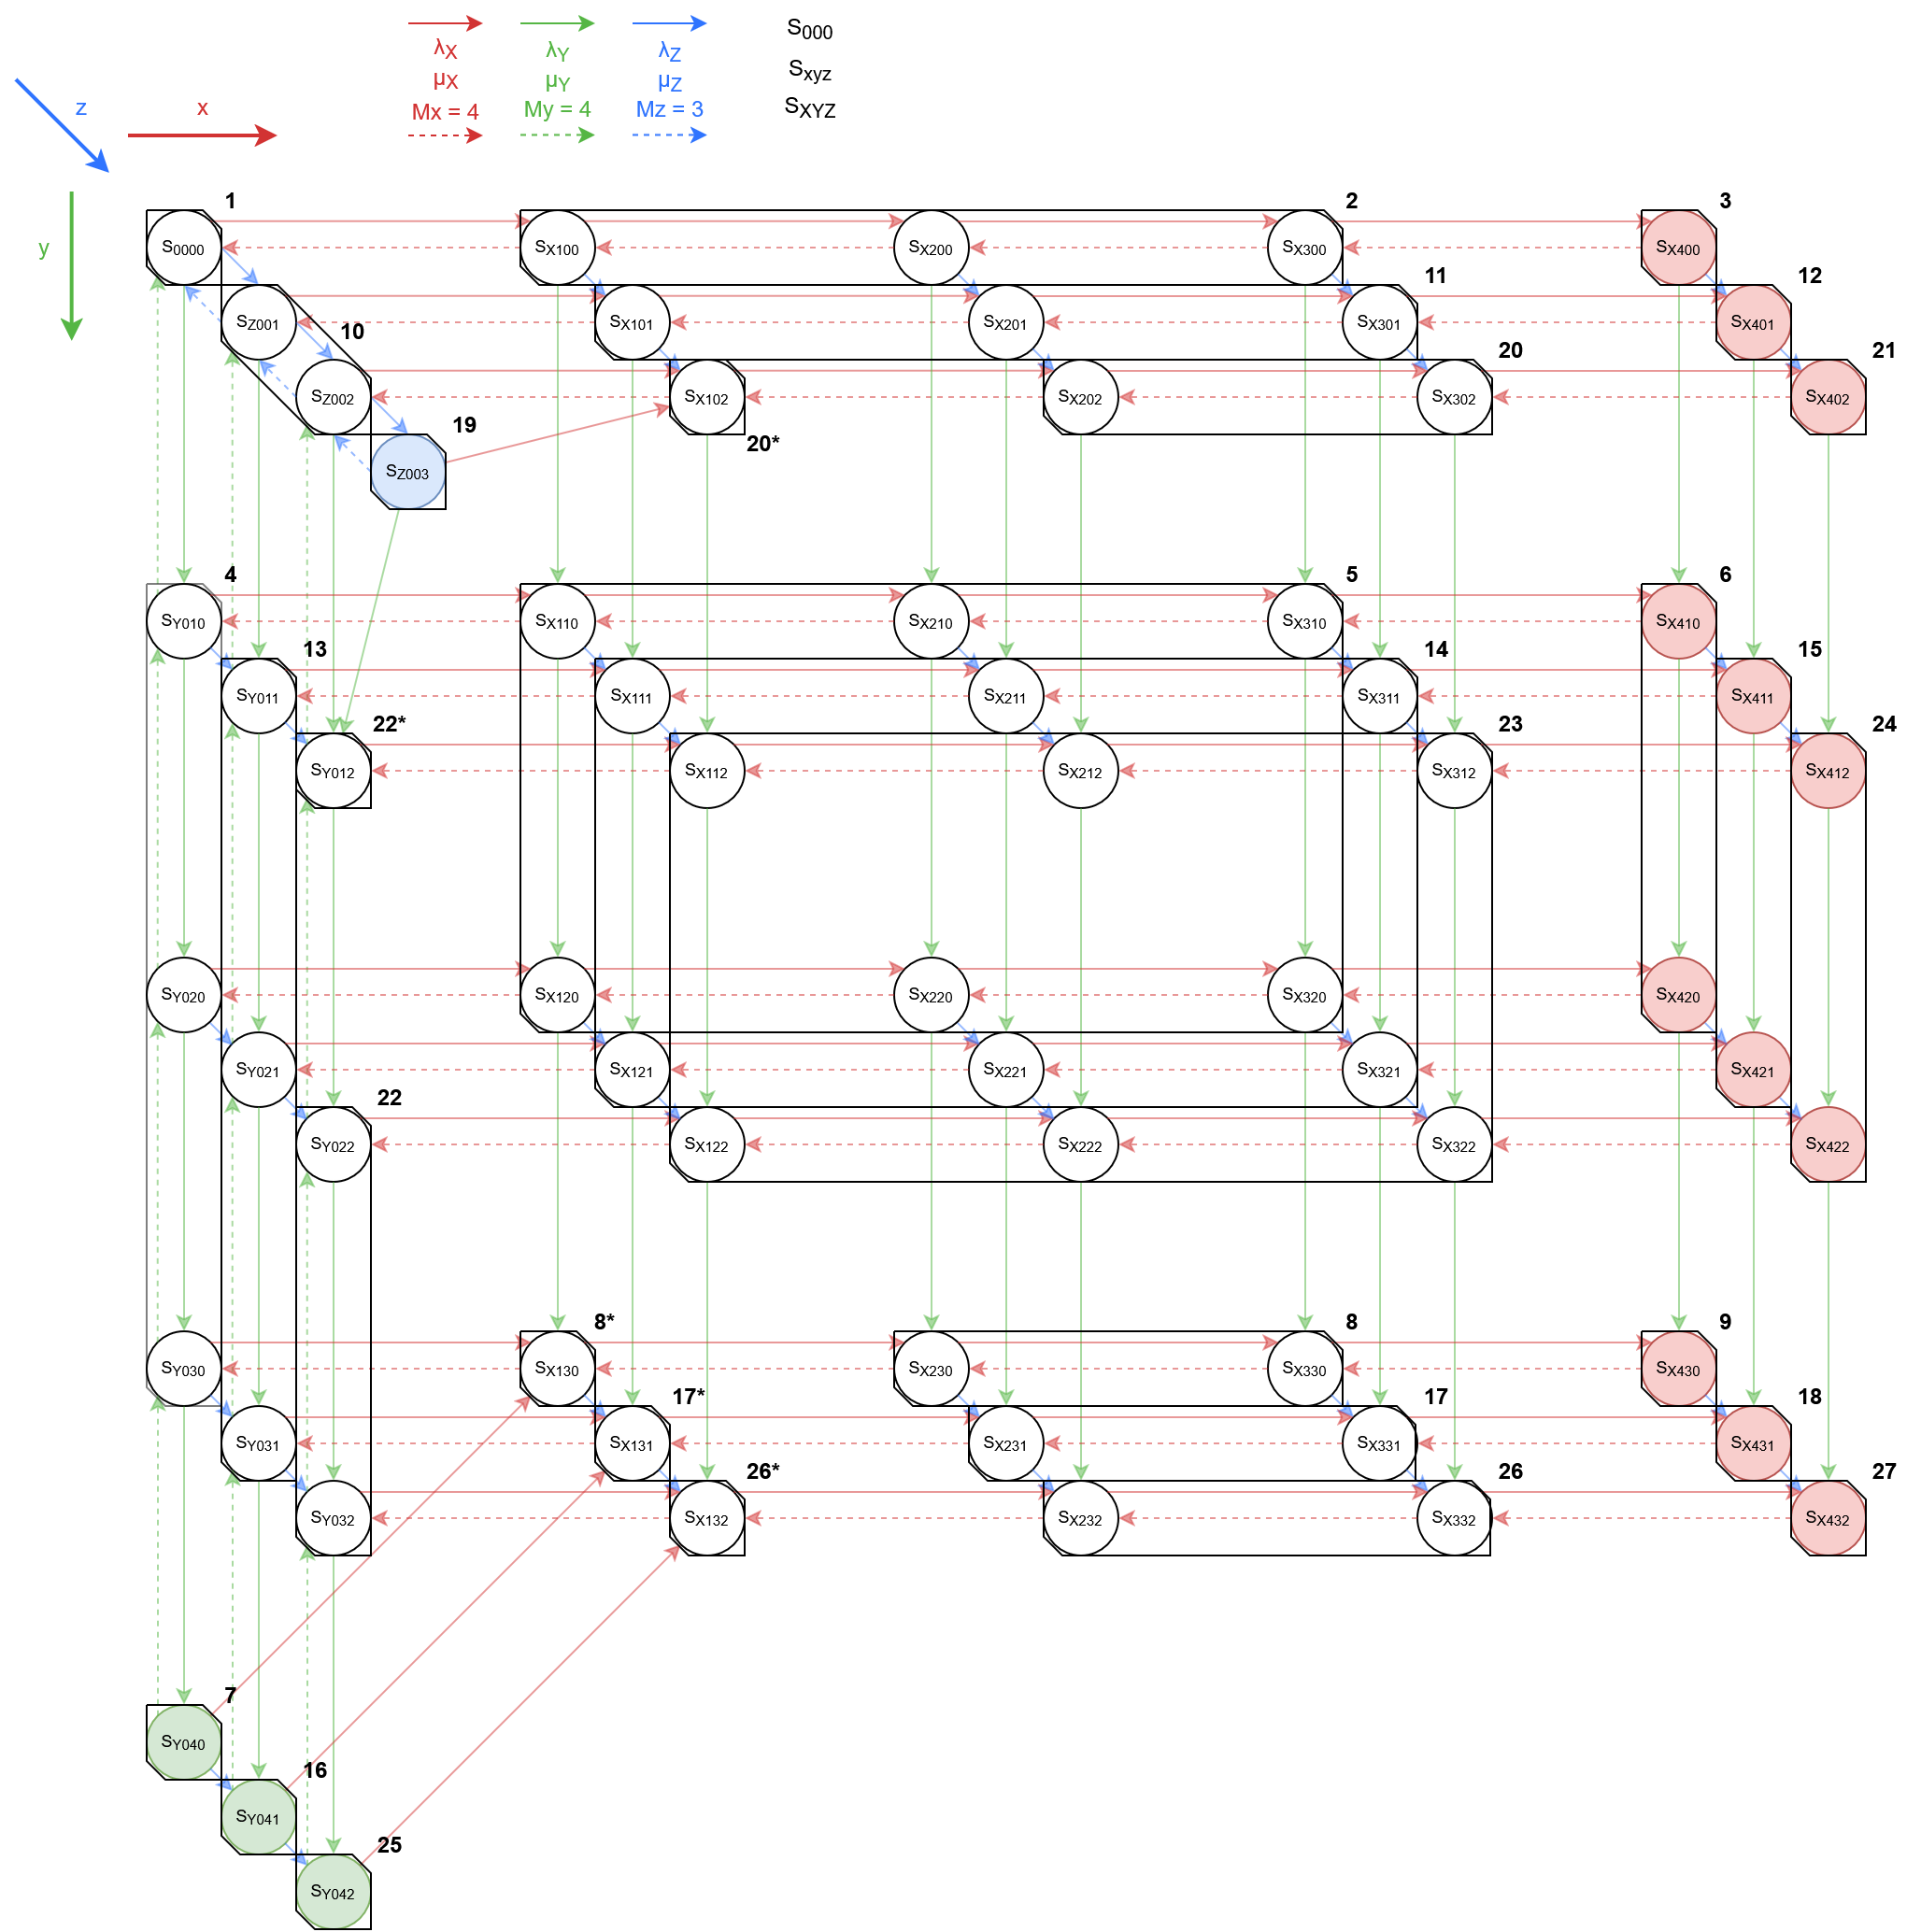

#### Уравнения Колмогорова по зонам

Для зон 1-3:

$$\frac{dP(0,0,0)}{dt} = \mu_x P(1,0,0) + \mu_y P(0,1,0) + \mu_z P(0,0,1) - (\lambda_x + \lambda_y + \lambda_z) P(0,0,0) \tag{1}$$

$$\frac{dP(x,0,0)}{dt} = \lambda_x P(x-1,0,0) + \mu_x P(x+1,0,0) - (\lambda_x + \lambda_y + \lambda_z + \mu_x) P(x,0,0) \tag{2}$$
$$x = 1,2...M_x-1$$

$$\frac{dP(M_x,0,0)}{dt} = \lambda_x P(M_x-1,0,0) - (\lambda_y + \lambda_z + \mu_x) P(M_x,0,0) \tag{3}$$

Для зон 4-6:

$$\frac{dP(0,y,0)}{dt} = \lambda_y P(0,y-1,0) + \mu_x P(1,y,0) + \mu_y P(0,y+1,0) - (\lambda_x + \lambda_y + \lambda_z + \mu_y) P(0,y,0) \tag{4}$$
$$y = 1,2...M_y-1$$

$$\frac{dP(x,y,0)}{dt} = \lambda_x P(x-1,y,0) + \lambda_y P(x,y-1,0) + \mu_x P(x+1,y,0) - (\lambda_x + \lambda_y + \lambda_z + \mu_x) P(x,y,0) \tag{5}$$
$$x = 1,2...M_x-1, y = 1,2...M_y-2$$

$$\frac{dP(M_x,y,0)}{dt} = \lambda_x P(M_x-1,y,0) + \lambda_y P(M_x,y-1,0) - (\lambda_y + \lambda_z + \mu_x) P(M_x,y,0) \tag{6}$$
$$y = 1,2...M_y-2$$

Для зон 7-9:

$$\frac{dP(0,M_y,0)}{dt} = \lambda_y P(0,M_y-1,0) - (\lambda_x + \lambda_z + \mu_y) P(0,M_y,0) \tag{7}$$

$$\frac{dP(1,M_y-1,0)}{dt} = \lambda_x (P(0,M_y-1,0) + P(0,M_y,0)) + \lambda_y P(1,M_y-2,0) + \mu_x P(2,M_y-1,0) - (\lambda_x + \lambda_z + \mu_x) P(1,M_y-1,0) \tag{8*}$$

$$\frac{dP(x,M_y-1,0)}{dt} = \lambda_x P(x-1,M_y-1,0) + \lambda_y P(x, M_y-2,0) + \mu_x P(x+1,M_y-1,0) - (\lambda_x + \lambda_z + \mu_x) P(x,M_y-1,0) \tag{8}$$
$$x = 2,3...M_x-1$$

$$\frac{dP(M_x,M_y-1,0)}{dt} = \lambda_x P(M_x-1,M_y-1,0) + \lambda_y P(M_x,M_y-2,0) - (\lambda_z + \mu_x) P(M_x,M_y-1,0) \tag{9}$$

Для зон 10-12:

$$\frac{dP(0,0,z)}{dt} = \lambda_z P(0,0,z-1) + \mu_x P(1,0,z) + \mu_y P(0,1,z) + \mu_z P(0,0,z+1) - (\lambda_x + \lambda_y + \lambda_z + \mu_z) P(0,0,z) \tag{10}$$
$$z = 1,2...M_z-1$$

$$\frac{dP(x,0,z)}{dt} = \lambda_x P(x-1,0,z) + \lambda_z P(x,0,z-1) + \mu_x P(x+1,0,z) - (\lambda_x + \lambda_y + \lambda_z + \mu_x) P(x,0,z) \tag{11}$$
$$x = 1,2...M_x-1,z = 1,2...M_z-2$$

$$\frac{dP(M_x,0,z)}{dt} = \lambda_x P(M_x-1,0,z) + \lambda_z P(M_x,0,z-1) - (\lambda_y + \lambda_z + \mu_x) P(M_x,0,z) \tag{12}$$
$$z = 1,2...M_z-2$$


Для зон 13-15:

$$\frac{dP(0,y,z)}{dt} = \lambda_y P(0,y-1,z) + \lambda_z P(0,y,z-1) + \mu_x P(1,y,z) + \mu_y P(0,y+1,z) - (\lambda_x + \lambda_y + \lambda_z + \mu_y) P(0,y,z) \tag{13}$$
$$y = 1,2...M_y-1, z = 1,2...M_z-2$$

$$\frac{dP(x,y,z)}{dt} = \lambda_x P(x-1,y,z) + \lambda_y P(x,y-1,z) + \lambda_z P(x,y,z-1) + \mu_x P(x+1,y,z) - (\lambda_x + \lambda_y + \lambda_z + \mu_x) P(x,y,z) \tag{14}$$
$$x = 1,2...M_x-1, y = 1,2...M_y-2, z = 1,2...M_z-2$$

$$\frac{dP(M_x,y,z)}{dt} = \lambda_x P(M_x-1,y,z) + \lambda_y P(M_x,y-1,z) + \lambda_z P(M_x,y,z-1) - (\lambda_y + \lambda_z + \mu_x) P(M_x,y,z) \tag{15}$$
$$y = 1,2...M_y-2, z = 1,2...M_z-2$$

Для зон 16-18:

$$\frac{dP(0,M_y,z)}{dt} = \lambda_y P(0,M_y-1,z) + \lambda_z P(0,M_y,z-1) - (\lambda_x + \lambda_z + \mu_y) P(0,M_y,z) \tag{16}$$
$$z = 1,2...M_z-2$$

$$\frac{dP(1,M_y-1,z)}{dt} = \lambda_x (P(0,M_y-1,z) + P(0,M_y,z)) + \lambda_y P(1,M_y-2,z) + \lambda_z P(1,M_y-1,z-1) + \mu_x P(2,M_y-1,z) - (\lambda_x + \lambda_z + \mu_x) P(1,M_y-1,z) \tag{17*}$$
$$z = 1,2...M_z-2$$

$$\frac{dP(x,M_y-1,z)}{dt} = \lambda_x P(x-1,M_y-1,z) + \lambda_y P(x,M_y-2,0) + \lambda_z P(x,M_y-1,z-1) + \mu_x P(x+1,M_y-1,z) - (\lambda_x + \lambda_z + \mu_x) P(x,M_y-1,z) \tag{17}$$
$$x = 2,3...M_x-1,z = 1,2...M_z-2$$

$$\frac{dP(M_x,M_y-1,z)}{dt} = \lambda_x P(M_x-1,M_y-1,z) + \lambda_y P(M_x,M_y-2,0) + \lambda_z P(M_x,M_y-1,z-1) - (\lambda_z + \mu_x) P(M_x,M_y-1,z) \tag{18}$$
$$z = 1,2...M_z-2$$

Для зон 19-21:

$$\frac{dP(0,0,M_z)}{dt} = \lambda_z P(0,0,M_z-1) - (\lambda_x + \lambda_y + \mu_z) P(0,0,M_z) \tag{19}$$

$$\frac{dP(1,0,M_z-1)}{dt} = \lambda_x (P(0,0,M_z-1) + P(0,0,M_z)) + \lambda_z P(1,0,M_z-2) + \mu_x P(2,0,M_z-1) - (\lambda_x + \lambda_y + \mu_x) P(1,0,M_z-1) \tag{20*}$$

$$\frac{dP(x,0,M_z-1)}{dt} = \lambda_x P(x-1,0,M_z-1) + \lambda_z P(x,0,M_z-2) + \mu_x P(x+1,0,M_z-1) - (\lambda_x + \lambda_y + \mu_x) P(x,0,M_z-1) \tag{20}$$
$$x = 2,3...M_x-1$$

$$\frac{dP(M_x,0,M_z-1)}{dt} = \lambda_x P(M_x-1,0,M_z-1) + \lambda_z P(M_x,0,M_z-2) - (\lambda_y + \mu_x) P(M_x,0,M_z-1) \tag{21}$$

Для зон 22-24:

$$\frac{dP(0,1,M_z-1)}{dt} = \lambda_y (P(0,0,M_z-1) + P(0,0,M_z)) + \lambda_z P(0,1,M_z-2) + \mu_x P(1,1,M_z-1) + \mu_y P(0,2,M_z-1) - (\lambda_x + \lambda_y + \mu_y) P(0,1,M_z-1) \tag{22*}$$

$$\frac{dP(0,y,M_z-1)}{dt} = \lambda_y P(0,y-1,M_z-1) + \lambda_z P(0,y,M_z-2) + \mu_x P(1,y,M_z-1) + \mu_y P(0,y+1,M_z-1) - (\lambda_x + \lambda_y + \mu_y) P(0,y,M_z-1) \tag{22}$$
$$y = 2,3...M_y-1$$

$$\frac{dP(x,y,M_z-1)}{dt} = \lambda_x P(x-1,y,M_z-1) + \lambda_y P(x,y-1,M_z-1) + \lambda_z P(x,y,M_z-2) + \mu_x P(x+1,y,M_z-1) - (\lambda_x + \lambda_y + \mu_x) P(x,y,M_z-1) \tag{23}$$
$$x = 1,2...M_x-1, y = 1,2...M_y-2$$

$$\frac{dP(M_x,y,M_z-1)}{dt} = \lambda_x P(M_x-1,y,M_z-1) + \lambda_y P(M_x,y-1,M_z-1) + \lambda_z P(M_x,y,M_z-2) - (\lambda_y + \mu_x) P(M_x,y,M_z-1) \tag{24}$$
$$y = 1,2...M_y-2$$

Для зон 25-27:

$$\frac{dP(0,M_y,M_z-1)}{dt} = \lambda_y P(0,M_y-1,M_z-1) + \lambda_z P(0,M_y,M_z-2) - (\lambda_x + \mu_y) P(0,M_y,M_z-1) \tag{25}$$

$$\frac{dP(1,M_y-1,M_z-1)}{dt} = \lambda_x (P(0,M_y-1,M_z-1) + P(0,M_y,M_z-1)) + \lambda_y P(1,M_y-2,M_z-1) + \lambda_z P(1,M_y-1,M_z-2) + \mu_x P(2,M_y-1,M_z-1) - (\lambda_x + \mu_x) P(1,M_y-1,M_z-1) \tag{26*}$$

$$\frac{dP(x,M_y-1,M_z-1)}{dt} = \lambda_x P(x-1,M_y-1,M_z-1) + \lambda_y P(x,M_y-2,M_z-1) + \lambda_z P(x,M_y-1,M_z-2) + \mu_x P(x+1,M_y-1,M_z-1) - (\lambda_x + \mu_x) P(x,M_y-1,M_z-1) \tag{26}$$
$$x = 2,3...M_x-1$$

$$\frac{dP(M_x,M_y-1,M_z-1)}{dt} = \lambda_x P(M_x-1,M_y-1,M_z-1) + \lambda_y P(M_x,M_y-2,M_z-1) + \lambda_z P(M_x,M_y-1,M_z-2) + \mu_x P(M_x,M_y-1,M_z-1) \tag{27}$$

#### Решение системы уравнений

##### Код программы для генерации строк диф. уравнений и их решения:

In [ ]:
seq = function(start, end) {
  if (start > end) {
    return(c())
  }
  return(c(start:end))
}

In [ ]:
# Для зон 1-3:

Zone_1 = "P_0_0_0 = μ_x * P_1_0_0 + μ_y * P_0_1_0 + μ_z * P_0_0_1 - (λ_x + λ_y + λ_z) * P_0_0_0"

get_Zone_2 = function() {
  eq <- c()
  for(x in seq(1, M_x-1)) {
    eq <- c(eq, glue("P_{x}_0_0 = λ_x * P_{x-1}_0_0 + μ_x * P_{x+1}_0_0 - (λ_x + λ_y + λ_z + μ_x) * P_{x}_0_0"))
  }
  return(eq)
}
Zone_2 = get_Zone_2()

Zone_3 = glue("P_{M_x}_0_0 = λ_x * P_{M_x-1}_0_0 - (λ_y + λ_z + μ_x) * P_{M_x}_0_0")

View(list(Zone_1, Zone_2, Zone_3))

[[1]]
[1] "P_0_0_0 = μ_x * P_1_0_0 + μ_y * P_0_1_0 + μ_z * P_0_0_1 - (λ_x + λ_y + λ_z) * P_0_0_0"

[[2]]
[1] "P_1_0_0 = λ_x * P_0_0_0 + μ_x * P_2_0_0 - (λ_x + λ_y + λ_z + μ_x) * P_1_0_0"

[[3]]
P_2_0_0 = λ_x * P_1_0_0 - (λ_y + λ_z + μ_x) * P_2_0_0

In [ ]:
# Для зон 4-6:

get_Zone_4 = function() {
  eq <- c()
  for(y in seq(1, M_y-1)) {
    eq <- c(eq, glue("P_0_{y}_0 = λ_y * P_0_{y-1}_0 + μ_x * P_1_{y}_0 + μ_y * P_0_{y+1}_0 - (λ_x + λ_y + λ_z + μ_y) * P_0_{y}_0"))
  }
  return(eq)
}
Zone_4 <- get_Zone_4()

get_Zone_5 = function() {
  eq <- c()
  for(x in seq(1, M_x-1)) {
    for(y in seq(1, M_y-2)) {
      eq <- c(eq, glue("P_{x}_{y}_0 = λ_x * P_{x-1}_{y}_0 + λ_y * P_{x}_{y-1}_0 + μ_x * P_{x+1}_{y}_0 - (λ_x + λ_y + λ_z + μ_x) * P_{x}_{y}_0"))
    }
  }
  return(eq)
}
Zone_5 <- get_Zone_5()

get_Zone_6 = function() {
  eq <- c()
  for(y in seq(1, M_y-2)) {
    eq <- c(eq, glue("P_{M_x}_{y}_0 = λ_x * P_{M_x-1}_{y}_0 + λ_y * P_{M_x}_{y-1}_0 - (λ_y + λ_z + μ_x) * P_{M_x}_{y}_0"))
  }
  return(eq)
}
Zone_6 <- get_Zone_6()

View(list(Zone_4, Zone_5, Zone_6))

[[1]]
[1] "P_0_1_0 = λ_y * P_0_0_0 + μ_x * P_1_1_0 + μ_y * P_0_2_0 - (λ_x + λ_y + λ_z + μ_y) * P_0_1_0"

[[2]]
NULL

[[3]]
NULL

In [ ]:
# Для зон 7-9

Zone_7 = glue("P_0_{M_y}_0 = λ_y * P_0_{M_y-1}_0 - (λ_x + λ_z + μ_y) * P_0_{M_y}_0")

Zone_8X = glue("P_1_{M_y-1}_0 = λ_x * (P_0_{M_y-1}_0 + P_0_{M_y}_0) + λ_y * P_1_{M_y-2}_0 + μ_x * P_2_{M_y-1}_0 - (λ_x + λ_z + μ_x) * P_1_{M_y-1}_0")

get_Zone_8 = function() {
  eq <- c()
  for(x in seq(2, M_x-1)) {
    eq <- c(eq, glue("P_{x}_{M_y-1}_0 = λ_x * P_{x-1}_{M_y-1}_0 + λ_y * P_{x}_{M_y-2}_0 + μ_x * P_{x+1}_{M_y-1}_0 - (λ_x + λ_z + μ_x) * P_{x}_{M_y-1}_0"))
  }
  return(eq)
}
Zone_8 = get_Zone_8()

Zone_9 = glue("P_{M_x}_{M_y-1}_0 = λ_x * P_{M_x-1}_{M_y-1}_0 + λ_y * P_{M_x}_{M_y-2}_0 - (λ_z + μ_x) * P_{M_x}_{M_y-1}_0")

View(list(Zone_7, Zone_8X, Zone_8, Zone_9))

[[1]]
P_0_2_0 = λ_y * P_0_1_0 - (λ_x + λ_z + μ_y) * P_0_2_0

[[2]]
P_1_1_0 = λ_x * (P_0_1_0 + P_0_2_0) + λ_y * P_1_0_0 + μ_x * P_2_1_0 - (λ_x + λ_z + μ_x) * P_1_1_0

[[3]]
NULL

[[4]]
P_2_1_0 = λ_x * P_1_1_0 + λ_y * P_2_0_0 - (λ_z + μ_x) * P_2_1_0

In [ ]:
# Для зон 10-12

get_Zone_10 = function() {
  eq <- c()
  for(z in 1:(M_z-1)) {
    eq <- c(eq, glue("P_0_0_{z} = λ_z * P_0_0_{z-1} + μ_x * P_1_0_{z} + μ_y * P_0_1_{z} + μ_z * P_0_0_{z+1} - (λ_x + λ_y + λ_z + μ_z) * P_0_0_{z}"))
  }
  return(eq)
}
Zone_10 = get_Zone_10()

get_Zone_11 = function() {
  eq <- c()
  for (x in seq(1, M_x-1)) {
    for (z in seq(1, M_z-2)) {
      eq <- c(eq, glue("P_{x}_0_{z} = λ_x * P_{x-1}_0_{z} + λ_z * P_{x}_0_{z-1} + μ_x * P_{x+1}_0_{z} - (λ_x + λ_y + λ_z + μ_x) * P_{x}_0_{z}"))
    }
  }
  return(eq)
}
Zone_11 = get_Zone_11()

get_Zone_12 = function() {
  eq <- c()
  for(z in seq(1, M_z-2)) {
    eq <- c(eq, glue("P_{M_x}_0_{z} = λ_x * P_{M_x-1}_0_{z} + λ_z * P_{M_x}_0_{z-1} - (λ_y + λ_z + μ_x) * P_{M_x}_0_{z}"))
  }
  return(eq)
}
Zone_12 = get_Zone_12()

View(list(Zone_10, Zone_11, Zone_12))

[[1]]
[1] "P_0_0_1 = λ_z * P_0_0_0 + μ_x * P_1_0_1 + μ_y * P_0_1_1 + μ_z * P_0_0_2 - (λ_x + λ_y + λ_z + μ_z) * P_0_0_1"

[[2]]
NULL

[[3]]
NULL

In [ ]:
# Для зон 13-15

get_Zone_13 = function() {
  eq <- c()
  for(y in seq(1, M_y-1)) {
    for(z in seq(1, M_z-2)) {
      eq <- c(eq, glue("P_0_{y}_{z} = λ_y * P_0_{y-1}_{z} + λ_z * P_0_{y}_{z-1} + μ_x * P_1_{y}_{z} + μ_y * P_0_{y+1}_{z} - (λ_x + λ_y + λ_z + μ_y) * P_0_{y}_{z}"))
    }
  }
  return(eq)
}
Zone_13 = get_Zone_13()

get_Zone_14 = function() {
  eq <- c()
  for(x in seq(1, M_x-1)) {
    for(y in seq(1, M_y-2)) {
      for(z in seq(1, M_z-2)) {
        eq <- c(eq, glue("P_{x}_{y}_{z} = λ_x * P_{x-1}_{y}_{z} + λ_y * P_{x}_{y-1}_{z} + λ_z * P_{x}_{y}_{z-1} + μ_x * P_{x+1}_{y}_{z} - (λ_x + λ_y + λ_z + μ_x) * P_{x}_{y}_{z}"))
      }
    }
  }
  return(eq)
}
Zone_14 = get_Zone_14()

get_Zone_15 = function() {
  eq <- c()
  for(y in seq(1, M_y-2)) {
    for(z in seq(1, M_z-2)) {
      eq <- c(eq, glue("P_{M_x}_{y}_{z} = λ_x * P_{M_x-1}_{y}_{z} + λ_y * P_{M_x}_{y-1}_{z} + λ_z * P_{M_x}_{y}_{z-1} - (λ_y + λ_z + μ_x) * P_{M_x}_{y}_{z}"))
    }
  }
  return(eq)
}
Zone_15 = get_Zone_15()

View(list(Zone_13, Zone_14, Zone_15))

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [ ]:
# Для зон 16-18

get_Zone_16 = function() {
  eq <- c()
  for(z in seq(1, M_z-2)) {
    eq <- c(eq, glue("P_0_{M_y}_{z} = λ_y * P_0_{M_y-1}_{z} + λ_z * P_0_{M_y}_{z-1} - (λ_x + λ_z + μ_y) * P_0_{M_y}_{z}"))
  }
  return(eq)
}
Zone_16 = get_Zone_16()

get_Zone_17X = function() {
  eq <- c()
  for(z in seq(1, M_z-2)) {
    eq <- c(eq, glue("P_1_{M_y-1}_{z} = λ_x * (P_0_{M_y-1}_{z} + P_0_{M_y}_{z}) + λ_y * P_1_{M_y-2}_{z} + λ_z * P_1_{M_y-1}_{z-1} + μ_x * P_2_{M_y-1}_{z} - (λ_x + λ_z + μ_x) * P_1_{M_y-1}_{z}"))
  }
  return(eq)
}
Zone_17X = get_Zone_17X()

get_Zone_17 = function() {
  eq <- c()
  for(x in seq(2, M_x-1)) {
    for(z in seq(1, M_z-2)) {
      eq <- c(eq, glue("P_{x}_{M_y-1}_{z} = λ_x * P_{x-1}_{M_y-1}_{z} + λ_y * P_{x}_{M_y-2}_0 + λ_z * P_{x}_{M_y-1}_{z-1} + μ_x * P_{x+1}_{M_y-1}_{z} - (λ_x + λ_z + μ_x) * P_{x}_{M_y-1}_{z}"))
    }
  }
  return(eq)
}
Zone_17 = get_Zone_17()

get_Zone_18 = function() {
  eq <- c()
  for(z in seq(1, M_z-2)) {
    eq <- c(eq, glue("P_{M_x}_{M_y-1}_{z} = λ_x * P_{M_x-1}_{M_y-1}_{z} + λ_y * P_{M_x}_{M_y-2}_0 + λ_z * P_{M_x}_{M_y-1}_{z-1} - (λ_z + μ_x) * P_{M_x}_{M_y-1}_{z}"))
  }
  return(eq)
}
Zone_18 = get_Zone_18()

View(list(Zone_16, Zone_17X, Zone_17, Zone_18))

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

In [ ]:
# Для зон 19-21

Zone_19 = glue("P_0_0_{M_z} = λ_z * P_0_0_{M_z-1} - (λ_x + λ_y + μ_z) * P_0_0_{M_z}")

Zone_20X = glue("P_1_0_{M_z-1} = λ_x * (P_0_0_{M_z-1} + P_0_0_{M_z}) + λ_z * P_1_0_{M_z-2} + μ_x * P_2_0_{M_z-1} - (λ_x + λ_y + μ_x) * P_1_0_{M_z-1}")

get_Zone_20 = function() {
  eq <- c()
  for(x in seq(2, M_x-1)) {
    eq <- c(eq, glue("P_{x}_0_{M_z-1} = λ_x * P_{x-1}_0_{M_z-1} + λ_z * P_{x}_0_{M_z-2} + μ_x * P_{x+1}_0_{M_z-1} - (λ_x + λ_y + μ_x) * P_{x}_0_{M_z-1}"))
  }
  return(eq)
}
Zone_20 = get_Zone_20()

Zone_21 = glue("P_{M_x}_0_{M_z-1} = λ_x * P_{M_x-1}_0_{M_z-1} + λ_z * P_{M_x}_0_{M_z-2} - (λ_y + μ_x) * P_{M_x}_0_{M_z-1}")

View(list(Zone_19, Zone_20X, Zone_20, Zone_21))

[[1]]
P_0_0_2 = λ_z * P_0_0_1 - (λ_x + λ_y + μ_z) * P_0_0_2

[[2]]
P_1_0_1 = λ_x * (P_0_0_1 + P_0_0_2) + λ_z * P_1_0_0 + μ_x * P_2_0_1 - (λ_x + λ_y + μ_x) * P_1_0_1

[[3]]
NULL

[[4]]
P_2_0_1 = λ_x * P_1_0_1 + λ_z * P_2_0_0 - (λ_y + μ_x) * P_2_0_1

In [ ]:
# Для зон 22-24

Zone_22X = glue("P_0_1_{M_z-1} = λ_y * (P_0_0_{M_z-1} + P_0_0_{M_z}) + λ_z * P_0_1_{M_z-2} + μ_x * P_1_1_{M_z-1} + μ_y * P_0_2_{M_z-1} - (λ_x + λ_y + μ_y) * P_0_1_{M_z-1}")

get_Zone_22 = function() {
  eq <- c()
  for(y in seq(2, M_y-1)) {
    eq <- c(eq, glue("P_0_{y}_{M_z-1} = λ_y * P_0_{y-1}_{M_z-1} + λ_z * P_0_{y}_{M_z-2} + μ_x * P_1_{y}_{M_z-1} + μ_y * P_0_{y+1}_{M_z-1} - (λ_x + λ_y + μ_y) * P_0_{y}_{M_z-1}"))
  }
  return(eq)
}
Zone_22 = get_Zone_22()

get_Zone_23 = function() {
  eq <- c()
  for(x in seq(1, M_x-1)) {
    for(y in seq(1, M_y-2)) {
      eq <- c(eq, glue("P_{x}_{y}_{M_z-1} = λ_x * P_{x-1}_{y}_{M_z-1} + λ_y * P_{x}_{y-1}_{M_z-1} + λ_z * P_{x}_{y}_{M_z-2} + μ_x * P_{x+1}_{y}_{M_z-1} - (λ_x + λ_y + μ_x) * P_{x}_{y}_{M_z-1}"))
    }
  }
  return(eq)
}
Zone_23 = get_Zone_23()

get_Zone_24 = function() {
  eq <- c()
  for(y in seq(1, M_y-2)) {
    eq <- c(eq, glue("P_{M_x}_{y}_{M_z-1} = λ_x * P_{M_x-1}_{y}_{M_z-1} + λ_y * P_{M_x}_{y-1}_{M_z-1} + λ_z * P_{M_x}_{y}_{M_z-2} - (λ_y + μ_x) * P_{M_x}_{y}_{M_z-1}"))
  }
  return(eq)
}
Zone_24 = get_Zone_24()

View(list(Zone_22X, Zone_22, Zone_23, Zone_24))

[[1]]
P_0_1_1 = λ_y * (P_0_0_1 + P_0_0_2) + λ_z * P_0_1_0 + μ_x * P_1_1_1 + μ_y * P_0_2_1 - (λ_x + λ_y + μ_y) * P_0_1_1

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

In [ ]:
# Для зон 25-27

Zone_25 = glue("P_0_{M_y}_{M_z-1} = λ_y * P_0_{M_y-1}_{M_z-1} + λ_z * P_0_{M_y}_{M_z-2} - (λ_x + μ_y) * P_0_{M_y}_{M_z-1}")

Zone_26X = glue("P_1_{M_y-1}_{M_z-1} = λ_x * (P_0_{M_y-1}_{M_z-1} + P_0_{M_y}_{M_z-1}) + λ_y * P_1_{M_y-2}_{M_z-1} + λ_z * P_1_{M_y-1}_{M_z-2} + μ_x * P_2_{M_y-1}_{M_z-1} - (λ_x + μ_x) * P_1_{M_y-1}_{M_z-1}")

get_Zone_26 = function() {
  eq <- c()
  for(x in seq(2, M_x-1)) {
    eq <- c(eq, glue("P_{x}_{M_y-1}_{M_z-1} = λ_x * P_{x-1}_{M_y-1}_{M_z-1} + λ_y * P_{x}_{M_y-2}_{M_z-1} + λ_z * P_{x}_{M_y-1}_{M_z-2} + μ_x * P_{x+1}_{M_y-1}_{M_z-1} - (λ_x + μ_x) * P_{x}_{M_y-1}_{M_z-1}"))
  }
  return(eq)
}
Zone_26 = get_Zone_26()

Zone_27 = glue("P_{M_x}_{M_y-1}_{M_z-1} = λ_x * P_{M_x-1}_{M_y-1}_{M_z-1} + λ_y * P_{M_x}_{M_y-2}_{M_z-1} + λ_z * P_{M_x}_{M_y-1}_{M_z-2} + μ_x * P_{M_x}_{M_y-1}_{M_z-1}")

View(list(Zone_25, Zone_26X, Zone_26, Zone_27))

[[1]]
P_0_2_1 = λ_y * P_0_1_1 + λ_z * P_0_2_0 - (λ_x + μ_y) * P_0_2_1

[[2]]
P_1_1_1 = λ_x * (P_0_1_1 + P_0_2_1) + λ_y * P_1_0_1 + λ_z * P_1_1_0 + μ_x * P_2_1_1 - (λ_x + μ_x) * P_1_1_1

[[3]]
NULL

[[4]]
P_2_1_1 = λ_x * P_1_1_1 + λ_y * P_2_0_1 + λ_z * P_2_1_0 + μ_x * P_2_1_1

##### Все уравнения:

In [ ]:
Zones = list(Zone_1, Zone_2, Zone_3, Zone_4, Zone_5, Zone_6, Zone_7, Zone_8X, Zone_8, Zone_9, Zone_10, Zone_11, Zone_12, Zone_13, Zone_14, Zone_15, Zone_16, Zone_17X, Zone_17, Zone_18, Zone_19, Zone_20X, Zone_20, Zone_21, Zone_22X, Zone_22, Zone_23, Zone_24, Zone_25, Zone_26X, Zone_26, Zone_27)
Zones = Filter(Negate(is.null), Zones)
View(Zones)

[[1]]
[1] "P_0_0_0 = μ_x * P_1_0_0 + μ_y * P_0_1_0 + μ_z * P_0_0_1 - (λ_x + λ_y + λ_z) * P_0_0_0"

[[2]]
[1] "P_1_0_0 = λ_x * P_0_0_0 + μ_x * P_2_0_0 - (λ_x + λ_y + λ_z + μ_x) * P_1_0_0"

[[3]]
P_2_0_0 = λ_x * P_1_0_0 - (λ_y + λ_z + μ_x) * P_2_0_0

[[4]]
[1] "P_0_1_0 = λ_y * P_0_0_0 + μ_x * P_1_1_0 + μ_y * P_0_2_0 - (λ_x + λ_y + λ_z + μ_y) * P_0_1_0"

[[5]]
P_0_2_0 = λ_y * P_0_1_0 - (λ_x + λ_z + μ_y) * P_0_2_0

[[6]]
P_1_1_0 = λ_x * (P_0_1_0 + P_0_2_0) + λ_y * P_1_0_0 + μ_x * P_2_1_0 - (λ_x + λ_z + μ_x) * P_1_1_0

[[7]]
P_2_1_0 = λ_x * P_1_1_0 + λ_y * P_2_0_0 - (λ_z + μ_x) * P_2_1_0

[[8]]
[1] "P_0_0_1 = λ_z * P_0_0_0 + μ_x * P_1_0_1 + μ_y * P_0_1_1 + μ_z * P_0_0_2 - (λ_x + λ_y + λ_z + μ_z) * P_0_0_1"

[[9]]
P_0_0_2 = λ_z * P_0_0_1 - (λ_x + λ_y + μ_z) * P_0_0_2

[[10]]
P_1_0_1 = λ_x * (P_0_0_1 + P_0_0_2) + λ_z * P_1_0_0 + μ_x * P_2_0_1 - (λ_x + λ_y + μ_x) * P_1_0_1

[[11]]
P_2_0_1 = λ_x * P_1_0_1 + λ_z * P_2_0_0 - (λ_y + μ_x) * P_2_0_1

[[12]]
P_0_1_1 = λ_y * (P_0_0_1 + P_0_0_2) + λ_z * P_0_1_0 + μ_x * P_1_1_1 + μ_y * P_0_2_1 - (λ_x + λ_y + μ_y) * P_0_1_1

[[13]]
P_0_2_1 = λ_y * P_0_1_1 + λ_z * P_0_2_0 - (λ_x + μ_y) * P_0_2_1

[[14]]
P_1_1_1 = λ_x * (P_0_1_1 + P_0_2_1) + λ_y * P_1_0_1 + λ_z * P_1_1_0 + μ_x * P_2_1_1 - (λ_x + μ_x) * P_1_1_1

[[15]]
P_2_1_1 = λ_x * P_1_1_1 + λ_y * P_2_0_1 + λ_z * P_2_1_0 + μ_x * P_2_1_1

In [ ]:
equations = unlist(Zones)
length(equations)
cat(paste(equations, collapse = '\n'))

[1] 15

P_0_0_0 = μ_x * P_1_0_0 + μ_y * P_0_1_0 + μ_z * P_0_0_1 - (λ_x + λ_y + λ_z) * P_0_0_0
P_1_0_0 = λ_x * P_0_0_0 + μ_x * P_2_0_0 - (λ_x + λ_y + λ_z + μ_x) * P_1_0_0
P_2_0_0 = λ_x * P_1_0_0 - (λ_y + λ_z + μ_x) * P_2_0_0
P_0_1_0 = λ_y * P_0_0_0 + μ_x * P_1_1_0 + μ_y * P_0_2_0 - (λ_x + λ_y + λ_z + μ_y) * P_0_1_0
P_0_2_0 = λ_y * P_0_1_0 - (λ_x + λ_z + μ_y) * P_0_2_0
P_1_1_0 = λ_x * (P_0_1_0 + P_0_2_0) + λ_y * P_1_0_0 + μ_x * P_2_1_0 - (λ_x + λ_z + μ_x) * P_1_1_0
P_2_1_0 = λ_x * P_1_1_0 + λ_y * P_2_0_0 - (λ_z + μ_x) * P_2_1_0
P_0_0_1 = λ_z * P_0_0_0 + μ_x * P_1_0_1 + μ_y * P_0_1_1 + μ_z * P_0_0_2 - (λ_x + λ_y + λ_z + μ_z) * P_0_0_1
P_0_0_2 = λ_z * P_0_0_1 - (λ_x + λ_y + μ_z) * P_0_0_2
P_1_0_1 = λ_x * (P_0_0_1 + P_0_0_2) + λ_z * P_1_0_0 + μ_x * P_2_0_1 - (λ_x + λ_y + μ_x) * P_1_0_1
P_2_0_1 = λ_x * P_1_0_1 + λ_z * P_2_0_0 - (λ_y + μ_x) * P_2_0_1
P_0_1_1 = λ_y * (P_0_0_1 + P_0_0_2) + λ_z * P_0_1_0 + μ_x * P_1_1_1 + μ_y * P_0_2_1 - (λ_x + λ_y + μ_y) * P_0_1_1
P_0_2_1 = λ_y * P_0_1_1 + λ_z * P_0_2_

##### Уравнения для Maxima

In [ ]:
states

ERROR: Error: object 'states' not found


In [ ]:
sort(states)

In [ ]:
get_states = function() {
  states <- c()
  for(zone in Zones) {
    str_index <- gregexpr(pattern = "=", zone)[[1]]
    state <- substring(zone, 1, str_index - 2)
    states <- c(states, state)
  }
  return(states)
}

states = get_states()
states = sort(states)
states_str = paste(states, collapse = ", ")
cat(states_str)

In [ ]:
cond_norm_sum = paste(states, collapse = " + ")
cond_norm = glue("1 = {cond_norm_sum}")
cond_norm

In [ ]:
prepare_maxima_equations = function() {
  prepared_maxima_equations <- c()
  for(equation in equations) {
    str_index <- gregexpr(pattern = "=", equation)[[1]]
    summs <- substring(equation, str_index, nchar(equation))
    prepared_maxima_equation <- glue("0 {summs}")
    prepared_maxima_equations <- c(prepared_maxima_equations, prepared_maxima_equation)
  }
  return(prepared_maxima_equations)
}
initial_maxima_equations = prepare_maxima_equations()
initial_maxima_equations

In [ ]:
maxima_equations <- c(cond_norm, initial_maxima_equations[-1])
maxima_equations_str <- paste(maxima_equations, collapse=",\n")
cat(maxima_equations_str)

##### Выражение для Maxima

In [ ]:
Maxima_expr <- glue("
λ_x: {λ_x}$
λ_y: {λ_y}$
λ_z: {λ_z}$
μ_x: {μ_x}$
μ_y: {μ_y}$
μ_z: {μ_z}$

solve([
  {maxima_equations_str}],
[{states_str}])$

float(%);")

cat(Maxima_expr)

##### Решение

In [ ]:
P_0_0_0=0.9806846654939142
P_0_0_1=0.01340490163133179
P_0_0_2=1.8350834001779192*10^-4
P_0_0_3=2.4129433011527265*10^-6
P_0_1_0=0.004414588370381289
P_0_1_1=7.957949599155888*10^-5
P_0_1_2=1.1892637993018229*10^-6
P_0_2_0=1.9877090302309822*10^-5
P_0_2_1=4.4492129565538637*10^-7
P_0_2_2=7.32698850954625*10^-9
P_0_3_0=8.950252400996917*10^-8
P_0_3_1=2.3935133646676334*10^-9
P_0_3_2=4.3617617368694996*10^-11
P_0_4_0=3.9993739849026077*10^-10
P_0_4_1=1.2416671077131505*10^-11
P_0_4_2=2.494194998355204*10^-13
P_1_0_0=0.0011833518555663446
P_1_0_1=1.7171299427599166*10^-5
P_1_0_2=2.390007360828884*10^-7
P_1_1_0=6.361089545677117*10^-6
P_1_1_1=1.1638903858335709*10^-7
P_1_1_2=1.7433938451925182*10^-9
P_1_2_0=2.9545215311310522*10^-8
P_1_2_1=6.634874155335664*10^-10
P_1_2_2=1.0933058853862303*10^-11
P_1_3_0=1.3442689770475768*10^-10
P_1_3_1=3.636615023024833*10^-12
P_1_3_2=6.569640214604335*10^-14
P_2_0_0=1.4279020192196555*10^-6
P_2_0_1=2.192192121277247*10^-8
P_2_0_2=3.071061886899795*10^-10
P_2_1_0=8.923576448531347*10^-9
P_2_1_1=1.6711495123078484*10^-10
P_2_1_2=2.5149227097078764*10^-12
P_2_2_0=4.3451048238618355*10^-11
P_2_2_1=9.832694889679837*10^-13
P_2_2_2=1.623247211329881*10^-14
P_2_3_0=2.0036587078245228*10^-13
P_2_3_1=4.2577433062014446*10^-14
P_2_3_2=1.29573548398419*10^-16
P_3_0_0=1.7229906489600078*10^-9
P_3_0_1=2.790270730676039*10^-11
P_3_0_2=3.943946143088422*10^-13
P_3_1_0=1.2273513816383216*10^-11
P_3_1_1=2.3637118609138287*10^-13
P_3_1_2=3.58139196405466*10^-15
P_3_2_0=6.315856487056434*10^-14
P_3_2_1=1.446265204056881*10^-15
P_3_2_2=2.3955584866347946*10^-17
P_3_3_0=2.9724293153299127*10^-16
P_3_3_1=1.06930077327047*10^-16
P_3_3_2=2.6677573958450735*10^-19
P_4_0_0=2.079066263129764*10^-12
P_4_0_1=3.541719059396615*10^-14
P_4_0_2=5.061049252607934*10^-16
P_4_1_0=1.6624784674368747*10^-14
P_4_1_1=3.3011358069610684*10^-16
P_4_1_2=5.045104779704384*10^-18
P_4_2_0=9.072271675335599*10^-17
P_4_2_1=2.1095866774311675*10^-18
P_4_2_2=3.51133893063289*10^-20
P_4_3_0=4.382456477392246*10^-19
P_4_3_1=2.0877064512217888*10^-19
P_4_3_2=-5.289984862289862*10^-22

In [ ]:
P = function(x, y, z) {
  return(eval(parse(text=glue("P_{x}_{y}_{z}"))))
}

##### Решение для ma = mb = mc = 1

In [ ]:
# ma = 1
# mb = 1
# mc = 1
# m_x = 1
# m_y = 1
# m_z = 1
# M_x = 2
# M_y = 2
# M_z = 2

In [ ]:
P_0_0_0=0.9806944503483483
P_1_0_0=0.0011833636654989888
P_2_0_0=1.4279192260489329*10^-6
P_0_1_0=0.004414633452999734
P_0_2_0=1.9726561211660728*10^-5
P_1_1_0=6.390542099573509*10^-6
P_2_1_0=8.965471910604973*10^-9
P_0_0_1=0.013405026606119976
P_0_0_2=1.7626212055471275*10^-4
P_1_0_1=1.7398794485267565*10^-5
P_2_0_1=2.2213719839999668*10^-8
P_0_1_1=8.072304561538799*10^-5
P_0_2_1=4.47538594249117*10^-7
P_1_1_1=1.1839613821962268*10^-7
P_2_1_1=-1.7008393305277985*10^-10

#### Расчет среднего времени ожидания заявок

Среднее время ожидания заявок:

$$T_{sist} = \frac{L_{sist}}{\lambda}$$

$$\lambda = \lambda_x + \lambda_y + \lambda_z$$

$$L_{sist} = L_{sist_x} + L_{sist_y} + L_{sist_z}$$

Количеста заявок каждого типа:

$$L_{sist_x} = \sum_{x=1,y=0,z=0}^{M_x,M_y-1,M_z-1} x \cdot P(x, y, z)$$

$$L_{sist_y} = \sum_{x=0,y=1,z=0}^{M_x,M_y-1,M_z-1} y \cdot P(x, y, z) + \sum_{z=0}^{M_z-1} M_y \cdot P(0, M_y, z)$$

$$L_{sist_z} = \sum_{x=0,y=0,z=1}^{M_x,M_y-1,M_z-1} z \cdot P(x, y, z) + M_z \cdot P(0, 0, M_z)$$

In [ ]:
λ <- λ_x + λ_y + λ_z
λ

In [ ]:
L_sist_x <- 0
for(x in 1:M_x) {
  for(y in 0:(M_y-1)) {
    for(z in 0:(M_z-1)) {
      P_val <- P(x, y, z)
      L_sist_x <- L_sist_x + x * P_val
    }
  }
}

L_sist_y <- 0
for(x in 0:M_x) {
  for(y in 1:(M_y-1)) {
    for(z in 0:(M_z-1)) {
      L_sist_y <- L_sist_y + y * P(x, y, z)
    }
  }
}
for(z in 0:(M_z-1)) {
  L_sist_y <- L_sist_y + M_y * P(0, M_y, z)
}

L_sist_z <- 0
for(x in 0:M_x) {
  for(y in 0:(M_y-1)) {
    for(z in 1:(M_z-1)) {
      L_sist_z <- L_sist_z + z * P(x, y, z)
    }
  }
}
L_sist_z <- L_sist_z + M_z * P(0, 0, M_z)

L_sist <- L_sist_x + L_sist_y + L_sist_z

View(data.frame(L_sist, L_sist_x, L_sist_y, L_sist_z))

In [ ]:
T_sist <- L_sist / λ
T_sist

In [ ]:
theor_absolute <- data.frame(T_sist, L_sist, λ, L_sist_x, L_sist_y, L_sist_z, row.names = "theor absolute")
View(theor_absolute)

### Теоретически (относительный приоритет)

Для $ma = mb = mc = 1$:

In [ ]:
ma = 1
mb = 1
mc = 1
m_x = 1
m_y = 1
m_z = 1
M_x = 2
M_y = 2
M_z = 2

In [ ]:
simple_state <- data.frame(c(X, Y, Z), c(λ_x, λ_y, λ_z), c(μ_x, μ_y, μ_z), c(m_x, m_y, m_z), c(M_x, M_y, M_z))
View(simple_state)

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1               
  c.M_x..M_y..M_z.
1 2               
2 2               
3 2

#### Граф состояний:

Красным цветом отмечены $\color{red}{\lambda_x, \mu_x}$ сплошными и штрихованными линиями соответственно.  
Аналогично отмечены $\color{green}{\lambda_y, \mu_y}$ и $\color{blue}{\lambda_z, \mu_z}$.

In [ ]:
View(simple_state)

c.X..Y..Z. c.λ_x..λ_y..λ_z. c.μ_x..μ_y..μ_z. c.m_x..m_y..m_z.
1 3          4.6765264        55.64986         1               
2 2          0.4725190        28.81840         1               
3 1          0.5973566        20.88088         1               
  c.M_x..M_y..M_z.
1 2               
2 2               
3 2

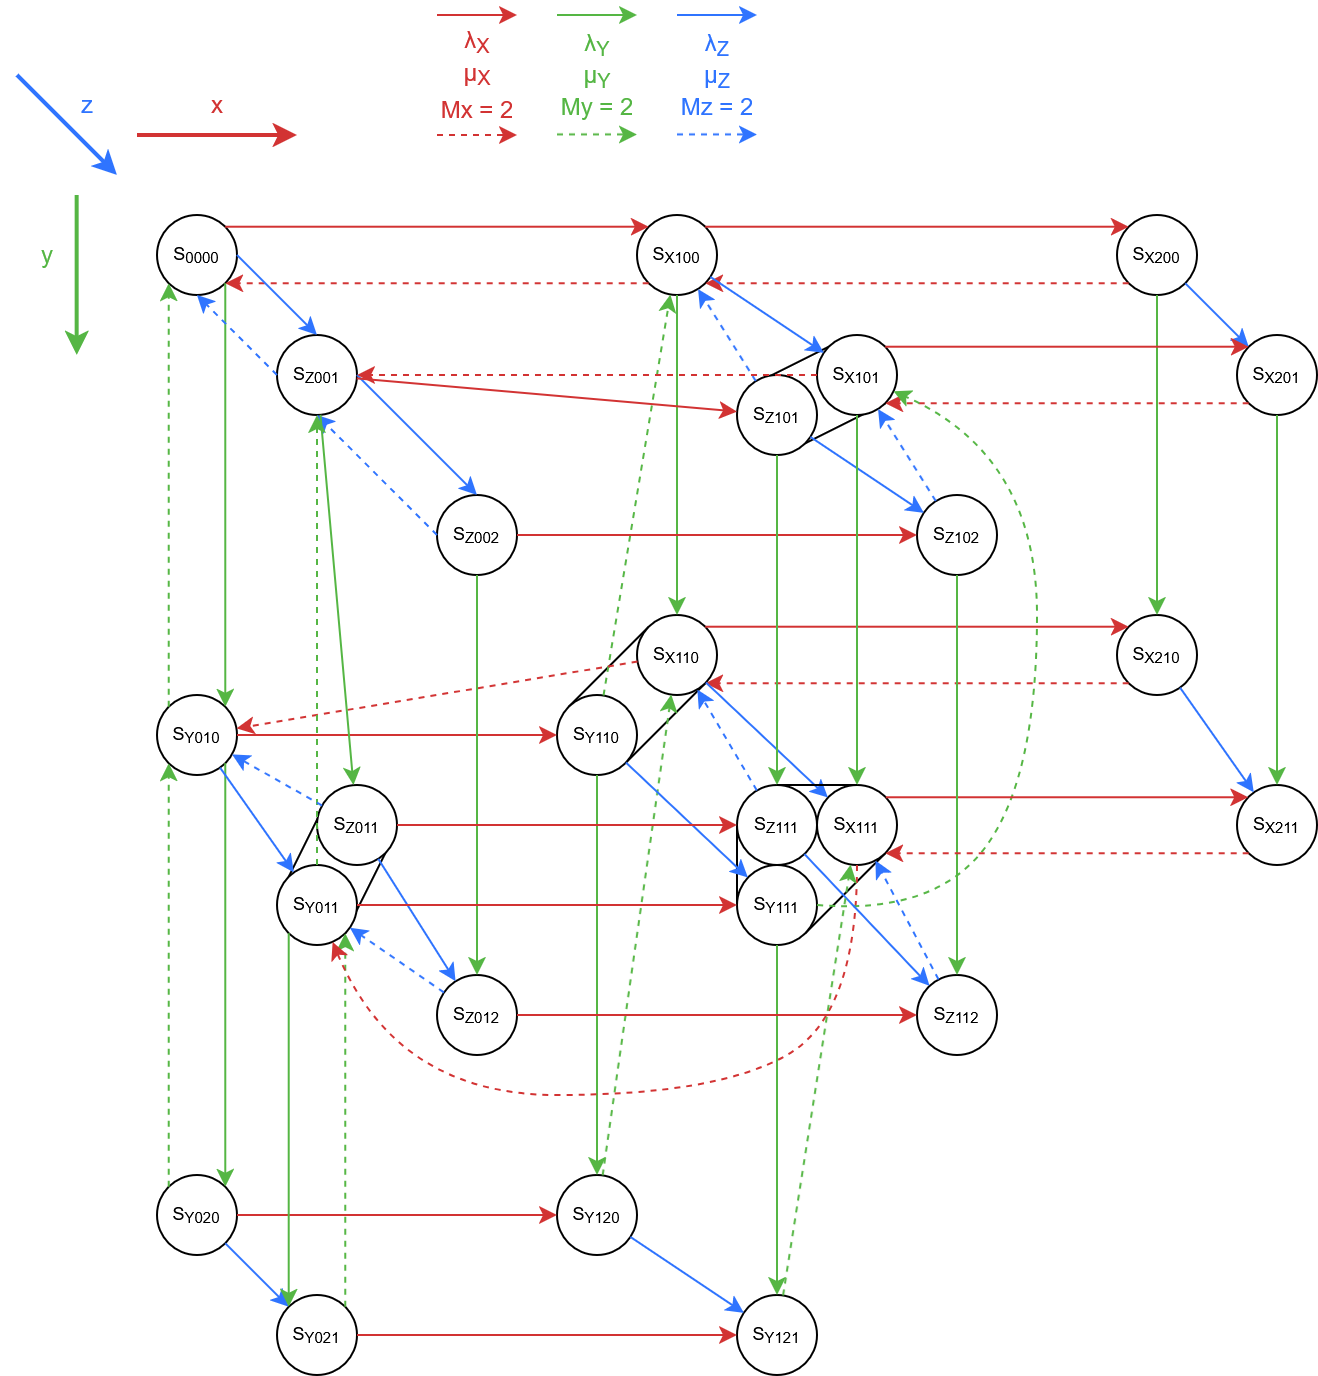

#### Уравнения Колмогорова

$$\frac{dP(0,0,0,0)}{dt} = \mu_x P(X,1,0,0) + \mu_y P(Y,0,1,0) + \mu_z P(Z, 0, 0, 1) - (\lambda_x + \lambda_y + \lambda_z) P(0,0,0,0)$$

$$\frac{dP(X,1,0,0)}{dt} = \lambda_x P(0,0,0,0) + \mu_x P(X,2,0,0) + \mu_y P(Y,1,1,0) + \mu_z P(Z,1,0,1) - (\lambda_x + \lambda_y + \lambda_z + \mu_x) P(X,1,0,0)$$

$$\frac{dP(X,2,0,0)}{dt} = \lambda_x P(X,1,0,0) - (\lambda_y + \lambda_z + \mu_x) P(X,2,0,0)$$

$$\frac{dP(Y,0,1,0)}{dt} = \lambda_y P(0,0,0,0) + \mu_x P(X,1,1,0) + \mu_y P(Y,0,2,0) + \mu_z P(Z,0,1,1) - (\lambda_x + \lambda_y + \lambda_z + \mu_y) P(Y, 0, 1, 0)$$

$$\frac{dP(Y,1,1,0)}{dt} = \lambda_x P(Y,0,1,0) - (\lambda_y + \lambda_z + \mu_y) P(Y, 1, 1, 0)$$

$$\frac{dP(X,1,1,0)}{dt} = \lambda_y P(X,1,0,0) + \mu_x P(X,2,1,0) + \mu_y P(Y,1,2,0) + \mu_z P(Z,1,1,1) - (\lambda_x + \lambda_z + \mu_x) P(X,1,1,0)$$

$$\frac{dP(X,2,1,0)}{dt} = \lambda_x P(X,1,1,0) + \lambda_y P(X,2,0,0) - (\lambda_z + \mu_x) P(X,2,1,0)$$

$$\frac{dP(Y,0,2,0)}{dt} = \lambda_y P(Y,0,1,0) - (\lambda_x + \lambda_z + \mu_y) P(Y,0,2,0)$$

$$\frac{dP(Y,1,2,0)}{dt} = \lambda_x P(Y,0,2,0) + \lambda_y P(Y,1,1,0) - (\lambda_z + \mu_y) P(Y,1,2,0)$$

$$\frac{dP(Z,0,0,1)}{dt} = \lambda_z P(0,0,0,0) + \mu_x P(X,1,0,1) + \mu_y P(Y,0,1,1) + \mu_z P(Z,0,0,2) - (\lambda_x + \lambda_y + \lambda_z + \mu_z) P(Z,0,0,1)$$

$$\frac{dP(Z,1,0,1)}{dt} = \lambda_x P(Z,0,0,1) - (\lambda_y + \lambda_z + \mu_z) P(Z,1,0,1)$$

$$\frac{dP(X,1,0,1)}{dt} = \lambda_z P(X,1,0,0) + \mu_x P(X,2,0,1) + \mu_y P(Y,1,1,1) + \mu_z P(Z,1,0,2) - (\lambda_x + \lambda_y + \mu_x) P(X,1,0,1)$$

$$\frac{dP(X,2,0,1)}{dt} = \lambda_x P(X,1,0,1) + \lambda_z P(X,2,0,0) - (\lambda_y + \mu_x) P(X,2,0,1)$$

$$\frac{dP(Y,0,1,1)}{dt} = \lambda_z P(Y,0,1,0) + \mu_x P(X,1,1,1) + \mu_y P(Y,0,2,1) + \mu_z P(Z,0,1,2) - (\lambda_x + \lambda_y + \mu_y) P(Y,0,1,1)$$

$$\frac{dP(Z,0,1,1)}{dt} = \lambda_y P(Z,0,0,1) - (\lambda_x + \lambda_z + \mu_z) P(Z,0,1,1)$$

$$\frac{dP(X,1,1,1)}{dt} = \lambda_y P(X,1,0,1) + \lambda_z P(X,1,1,0) + \mu_x P(X,2,1,1) + \mu_y P(Y,1,2,1) + \mu_z P(Z,1,1,2) - (\lambda_x + \mu_x) P(X,1,1,1)$$

$$\frac{dP(Y,1,1,1)}{dt} = \lambda_x P(Y,0,1,1) + \lambda_z P(Y,1,1,0) - (\lambda_y + \mu_y) P(Y,1,1,1)$$

$$\frac{dP(Z,1,1,1)}{dt} = \lambda_x P(Z,0,1,1) + \lambda_y P(Z,1,0,1) - (\lambda_z + \mu_z) P(Z,1,1,1)$$

$$\frac{dP(X,2,1,1)}{dt} = \lambda_x P(X,1,1,1) + \lambda_y P(X,2,0,1) + \lambda_z P(X,2,1,0) - \mu_x P(X,2,1,1)$$

$$\frac{dP(Y,0,2,1)}{dt} = \lambda_y P(Y,0,1,1) + \lambda_z P(Y,0,2,0) - (\lambda_x + \mu_y) P(Y,0,2,1)$$

$$\frac{dP(Y,1,2,1)}{dt} = \lambda_x P(Y,0,2,1) + \lambda_y P(Y,1,1,1) + \lambda_z P(Y,1,2,0) - \mu_y P(Y,1,2,1)$$

$$\frac{dP(Z,0,0,2)}{dt} = \lambda_z P(Z,0,0,1) - (\lambda_x + \lambda_y + \mu_z) P(Z,0,0,2)$$

$$\frac{dP(Z,1,0,2)}{dt} = \lambda_x P(Z,0,0,2) + \lambda_z P(Z,1,0,1) - (\lambda_y + \mu_z) P(Z,1,0,2)$$

$$\frac{dP(Z,0,1,2)}{dt} = \lambda_y P(Z,0,0,2) + \lambda_z P(Z,0,1,1) - (\lambda_x + \mu_z) P(Z,0,1,2)$$

$$\frac{dP(Z,1,1,2)}{dt} = \lambda_x P(Z,0,1,2) + \lambda_y P(Z,1,0,2) + \lambda_z P(Z,1,1,1) - \mu_z P(Z,1,1,2)$$

#### Решение уравнений в Maxima

Выражение для Maxima:

In [ ]:
cat("λ_x: 0.349841070842105$
λ_y: 0.253074348688568$
λ_z: 0.243767742963297$
μ_x: 289.427969047223$
μ_y: 56.0422373343949$
μ_z: 17.9360257315971$

solve([
1 = P_Z_1_1_2 + P_Z_0_1_2 + P_Z_1_0_2 + P_Z_0_0_2 + P_Y_1_2_1 + P_Y_0_2_1 + P_X_2_1_1 + P_Z_1_1_1 + P_Y_1_1_1 + P_X_1_1_1 + P_Z_0_1_1 + P_Y_0_1_1 + P_X_2_0_1 + P_X_1_0_1 + P_Z_1_0_1 + P_Z_0_0_1 + P_Y_1_2_0 + P_Y_0_2_0 + P_X_2_1_0 + P_X_1_1_0 + P_Y_1_1_0 + P_Y_0_1_0 + P_X_2_0_0 + P_X_1_0_0 + P_0_0_0_0,
0 = λ_x * P_0_0_0_0 + μ_x * P_X_2_0_0 + μ_y * P_Y_1_1_0 + μ_z * P_Z_1_0_1 - (λ_x + λ_y + λ_z + μ_x) * P_X_1_0_0,
0 = λ_x * P_X_1_0_0 - (λ_y + λ_z + μ_x) * P_X_2_0_0,
0 = λ_y * P_0_0_0_0 + μ_x * P_X_1_1_0 + μ_y * P_Y_0_2_0 + μ_z * P_Z_0_1_1 - (λ_x + λ_y + λ_z + μ_y) * P_Y_0_1_0,
0 = λ_x * P_Y_0_1_0 - (λ_y + λ_z + μ_y) * P_Y_1_1_0,
0 = λ_y * P_X_1_0_0 + μ_x * P_X_2_1_0 + μ_y * P_Y_1_2_0 + μ_z * P_Z_1_1_1 - (λ_x + λ_z + μ_x) * P_X_1_1_0,
0 = λ_x * P_X_1_1_0 + λ_y * P_X_2_0_0 - (λ_z + μ_x) * P_X_2_1_0,
0 = λ_y * P_Y_0_1_0 - (λ_x + λ_z + μ_y) * P_Y_0_2_0,
0 = λ_x * P_Y_0_2_0 + λ_y * P_Y_1_1_0 - (λ_z + μ_y) * P_Y_1_2_0,
0 = λ_z * P_0_0_0_0 + μ_x * P_X_1_0_1 + μ_y * P_Y_0_1_1 + μ_z * P_Z_0_0_2 - (λ_x + λ_y + λ_z + μ_z) * P_Z_0_0_1,
0 = λ_x * P_Z_0_0_1 - (λ_y + λ_z + μ_z) * P_Z_1_0_1,
0 = λ_z * P_X_1_0_0 + μ_x * P_X_2_0_1 + μ_y * P_Y_1_1_1 + μ_z * P_Z_1_0_2 - (λ_x + λ_y + μ_x) * P_X_1_0_1,
0 = λ_x * P_X_1_0_1 + λ_z * P_X_2_0_0 - (λ_y + μ_x) * P_X_2_0_1,
0 = λ_z * P_Y_0_1_0 + μ_x * P_X_1_1_1 + μ_y * P_Y_0_2_1 + μ_z * P_Z_0_1_2 - (λ_x + λ_y + μ_y) * P_Y_0_1_1,
0 = λ_y * P_Z_0_0_1 - (λ_x + λ_z + μ_z) * P_Z_0_1_1,
0 = λ_y * P_X_1_0_1 + λ_z * P_X_1_1_0 + μ_x * P_X_2_1_1 + μ_y * P_Y_1_2_1 + μ_z * P_Z_1_1_2 - (λ_x + μ_x) * P_X_1_1_1,
0 = λ_x * P_Y_0_1_1 + λ_z * P_Y_1_1_0 - (λ_y + μ_y) * P_Y_1_1_1,
0 = λ_x * P_Z_0_1_1 + λ_y * P_Z_1_0_1 - (λ_z + μ_z) * P_Z_1_1_1,
0 = λ_x * P_X_1_1_1 + λ_y * P_X_2_0_1 + λ_z * P_X_2_1_0 - μ_x * P_X_2_1_1,
0 = λ_y * P_Y_0_1_1 + λ_z * P_Y_0_2_0 - (λ_x + μ_y) * P_Y_0_2_1,
0 = λ_x * P_Y_0_2_1 + λ_y * P_Y_1_1_1 + λ_z * P_Y_1_2_0 - μ_y * P_Y_1_2_1,
0 = λ_z * P_Z_0_0_1 - (λ_x + λ_y + μ_z) * P_Z_0_0_2,
0 = λ_x * P_Z_0_0_2 + λ_z * P_Z_1_0_1 - (λ_y + μ_z) * P_Z_1_0_2,
0 = λ_y * P_Z_0_0_2 + λ_z * P_Z_0_1_1 - (λ_x + μ_z) * P_Z_0_1_2,
0 = λ_x * P_Z_0_1_2 + λ_y * P_Z_1_0_2 + λ_z * P_Z_1_1_1 - μ_z * P_Z_1_1_2],
[P_0_0_0_0,P_X_1_0_0,P_X_1_0_1,P_X_1_1_0,P_X_1_1_1,P_X_2_0_0,P_X_2_0_1,P_X_2_1_0,P_X_2_1_1,P_Y_0_1_0,P_Y_0_1_1,P_Y_0_2_0,P_Y_0_2_1,P_Y_1_1_0,P_Y_1_1_1,P_Y_1_2_0,P_Y_1_2_1,P_Z_0_0_1,P_Z_0_0_2,P_Z_0_1_1,P_Z_0_1_2,P_Z_1_0_1,P_Z_1_0_2,P_Z_1_1_1,P_Z_1_1_2])$

float(%);")

#### Решение системы уравнений

In [ ]:
P_0_0_0_0=0.9806886209211108
P_X_1_0_0=0.001203909278803625
P_X_1_0_1=1.4700326987533563*10^-6
P_X_1_1_0=1.5243201503558256*10^-6
P_X_1_1_1=2.0442387676144996*10^-8
P_X_2_0_0=1.4527108240200317*10^-6
P_X_2_0_1=2.9977862620014116*10^-9
P_X_2_1_0=3.1101192312073236*10^-9
P_X_2_1_1=2.9950099068965165*10^-11
P_Y_0_1_0=0.004445861472369118
P_Y_0_1_1=2.0910389622506135*10^-5
P_Y_0_2_0=1.986610200075852*10^-5
P_Y_0_2_1=1.7971669722679173*10^-7
P_Y_1_1_0=2.7509201672511597*10^-5
P_Y_1_1_1=2.490645966865977*10^-7
P_Y_1_2_0=2.471636008719584*10^-7
P_Y_1_2_1=3.321684935780717*10^-9
P_Z_0_0_1=0.012975644950249587
P_Z_0_0_2=1.7061619955695392*10^-4
P_Z_0_1_1=1.7721897787850797*10^-4
P_Z_0_1_2=4.72380416851658*10^-6
P_Z_1_0_1=2.462673506797906*10^-4
P_Z_1_0_2=6.581996342223555*10^-6
P_Z_1_1_1=6.838494977683685*10^-6
P_Z_1_1_2=2.779500713658315*10^-7

In [ ]:
try_Pk = function(k, x, y, z) {
  tryCatch( {
    return(eval(parse(text=glue("P_{k}_{x}_{y}_{z}"))))
  }, error = function(e) { return(0) })
}

#### Расчет среднего времени ожидания заявок

Среднее время ожидания заявок:

$$T_{sist} = \frac{L_{sist}}{\lambda}$$

$$\lambda = \lambda_x + \lambda_y + \lambda_z$$

$$L_{sist} = L_{sist_x} + L_{sist_y} + L_{sist_z}$$

Количеста заявок каждого типа:

$$L_{sist_x} = \sum x \cdot P(k, x, y, z)$$

$$L_{sist_y} = \sum y \cdot P(k, x, y, z)$$

$$L_{sist_z} = \sum z \cdot P(k, x, y, z)$$

In [ ]:
λ <- λ_x + λ_y + λ_z
λ

In [ ]:
L_sist_x <- 0
L_sist_y <- 0
L_sist_z <- 0
Pk_sum <- 0
for(x in 0:M_x) {
  for(y in 0:M_y) {
    for(z in 0:M_z) {
      for(k in c("0", "X", "Y", "Z")) {
        Pk <- try_Pk(k, x, y, z)
        # print(glue("P_{k}_{x}_{y}_{z} = {Pk}"))
        Pk_sum <- Pk_sum + Pk
        L_sist_x <- L_sist_x + x * Pk
        L_sist_y <- L_sist_y + y * Pk
        L_sist_z <- L_sist_z + z * Pk
      }
    }
  }
}

L_sist <- L_sist_x + L_sist_y + L_sist_z

View(data.frame(L_sist, L_sist_x, L_sist_y, L_sist_z, Pk_sum))

In [ ]:
T_sist <- L_sist / λ
T_sist

In [ ]:
theor_otnos <- data.frame(T_sist, L_sist, λ, L_sist_x, L_sist_y, L_sist_z, row.names = "theor otnos")
View(simple_state)
View(theor_otnos)

In [ ]:
View(initial_state)
View(theor_absolute)

### Экспериментально (абсолютный приоритет)

In [ ]:
λs <- c(λ_z, λ_y, λ_x)
μs <- c(μ_z, μ_y, μ_x)
ms <- c(m_z, m_y, m_x)
Ms <- c(M_z, M_y, M_x)
Ps <- length(Ms)
View(data.frame(λs, μs, ms, Ms, Ps))

In [ ]:
MAX <- .Machine$double.xmax

get_min_value_and_id_by <- function(objects, field_accessor) {
  min_value <- .Machine$integer.max
  min_value_id <- NA

  if (length(objects) > 0) {
    for (id in 1:length(objects)) {
      value <- objects[[id]][[field_accessor]]
      if (!is.null(value) && value < min_value) {
        min_value <- value
        min_value_id <- id
      }
    }
  }

  return(list(value = min_value, id = min_value_id))
}

get_process_time <- function(request_type) {
  return(rexp(1, μs[request_type]))
}

get_request <- function(t, request_type) {
  spawn_time <- t + rexp(1, λs[request_type])
  return(list(
    type = request_type,
    spawn_time = spawn_time
  ))
}

In [ ]:
simulate_absolute = function(ITERATIONS_COUNT_MAX = 1e5) {
  print(paste("ITERATIONS_COUNT_MAX =", ITERATIONS_COUNT_MAX))
  iteration_number <- 0
  t <- 0

  current_processed_request_type <- -1
  planned_requests <- lapply(c(1:Ps), \(i) get_request(t, i))

  queues <- lapply(c(1:Ps), \(i) list())

  get_current_processed_done_time <- function() {
    if (current_processed_request_type == -1) {
      return(MAX)
    }
    return(queues[[current_processed_request_type]][[1]][["done_time"]])
  }

  set_current_processed_request_type <- function(t, type) {
    if (current_processed_request_type > 0) {
        # print("removing currently processed request")
      if (length(queues[[current_processed_request_type]]) >= ms[[current_processed_request_type]]) {
        queues[[current_processed_request_type]] <<- queues[[current_processed_request_type]][-1]
      }
    }
    current_processed_request_type <<- type
    if (type > 0) {
      queues[[type]][[1]][["done_time"]] <<- t + get_process_time(type)
    }
  }

  get_next_processed_request_type <- function() {
    for(i in Ps:1) {
      queue_length <- length(queues[[i]])
      if (queue_length > 0) {
        return(i)
      }
    }
    return(-1)
  }

  T_sist <- 0
  processed_count <- 0

  while(iteration_number < ITERATIONS_COUNT_MAX) {
    process_done_time <- get_current_processed_done_time()
    # print(paste("current_processed_request_type = ", current_processed_request_type, "process_done_time = ", process_done_time))

    spawn_request_value_and_type <- get_min_value_and_id_by(planned_requests, "spawn_time")
    spawn_time <- spawn_request_value_and_type$value
    spawn_request_type <- spawn_request_value_and_type$id

    next_t <- min(process_done_time, spawn_time)
    d_t <- next_t - t

    # View(unlist(lapply(queues, \(x) length(x))))
    if (next_t == spawn_time) {
      # Появление заявки
      if (length(queues[[spawn_request_type]]) < ms[[spawn_request_type]]) {
        queues[[spawn_request_type]] <- append(
          queues[[spawn_request_type]],
          list(planned_requests[[spawn_request_type]]))

        if (spawn_request_type > current_processed_request_type) {
          # print("setting new current_processed_request_type")
          set_current_processed_request_type(next_t, spawn_request_type)
        }
      }

      planned_requests[[spawn_request_type]] <- get_request(next_t, spawn_request_type)
    } else {
      # Обработка заявки
      T_sist <- T_sist + next_t - queues[[current_processed_request_type]][[1]][["spawn_time"]]
      processed_count <- processed_count + 1

      queues[[current_processed_request_type]] <- queues[[current_processed_request_type]][-1]
      next_processed_request_type <- get_next_processed_request_type()
      set_current_processed_request_type(next_t, next_processed_request_type)
    }

    t <- next_t
    iteration_number <- iteration_number + 1
  }

  T_sist <- T_sist / processed_count

  queue_lengths <- unlist(lapply(queues, \(x) length(x)))
  return(data.frame(T_sist, processed_count, row.names = "experiment absolute"))
}

In [ ]:
simulation_results <- simulate_absolute(1e5)
View(simulation_results)
View(theor_absolute)
View(theor_otnos)
View(initial_state)

### Экспериментально (относительный приоритет)

In [ ]:
λs <- c(λ_z, λ_y, λ_x)
μs <- c(μ_z, μ_y, μ_x)
ms <- c(m_z, m_y, m_x)
Ms <- c(M_z, M_y, M_x)
Ps <- length(Ms)
View(data.frame(λs, μs, ms, Ms, Ps))

In [ ]:
MAX <- .Machine$double.xmax

get_min_value_and_id_by <- function(objects, field_accessor) {
  min_value <- .Machine$integer.max
  min_value_id <- NA

  if (length(objects) > 0) {
    for (id in 1:length(objects)) {
      value <- objects[[id]][[field_accessor]]
      if (!is.null(value) && value < min_value) {
        min_value <- value
        min_value_id <- id
      }
    }
  }

  return(list(value = min_value, id = min_value_id))
}

get_process_time <- function(request_type) {
  return(rexp(1, μs[request_type]))
}

get_request <- function(t, request_type) {
  spawn_time <- t + rexp(1, λs[request_type])
  return(list(
    type = request_type,
    spawn_time = spawn_time
  ))
}

In [ ]:
simulate_otnos = function(ITERATIONS_COUNT_MAX = 1e5) {
  print(paste("ITERATIONS_COUNT_MAX =", ITERATIONS_COUNT_MAX))
  iteration_number <- 0
  t <- 0

  current_processed_request_type <- -1
  planned_requests <- lapply(c(1:Ps), \(i) get_request(t, i))

  queues <- lapply(c(1:Ps), \(i) list())

  get_current_processed_done_time <- function() {
    if (current_processed_request_type == -1) {
      return(MAX)
    }
    return(queues[[current_processed_request_type]][[1]][["done_time"]])
  }

  set_current_processed_request_type <- function(t, type) {
    current_processed_request_type <<- type
    if (type > 0) {
      queues[[type]][[1]][["done_time"]] <<- t + get_process_time(type)
    }
  }

  get_next_processed_request_type <- function() {
    for(i in Ps:1) {
      queue_length <- length(queues[[i]])
      if (queue_length > 0) {
        return(i)
      }
    }
    return(-1)
  }

  T_sist <- 0
  processed_count <- 0

  while(iteration_number < ITERATIONS_COUNT_MAX) {
    process_done_time <- get_current_processed_done_time()
    # print(paste("current_processed_request_type = ", current_processed_request_type, "process_done_time = ", process_done_time))

    spawn_request_value_and_type <- get_min_value_and_id_by(planned_requests, "spawn_time")
    spawn_time <- spawn_request_value_and_type$value
    spawn_request_type <- spawn_request_value_and_type$id

    next_t <- min(process_done_time, spawn_time)
    d_t <- next_t - t

    # View(unlist(lapply(queues, \(x) length(x))))
    if (next_t == spawn_time) {
      # Появление заявки
      if (length(queues[[spawn_request_type]]) <= ms[[spawn_request_type]]) {
        queues[[spawn_request_type]] <- append(
          queues[[spawn_request_type]],
          list(planned_requests[[spawn_request_type]]))

        if (current_processed_request_type == -1) {
          set_current_processed_request_type(next_t, spawn_request_type)
        }
      }

      planned_requests[[spawn_request_type]] <- get_request(next_t, spawn_request_type)
    } else {
      # Обработка заявки
      T_sist <- T_sist + next_t - queues[[current_processed_request_type]][[1]][["spawn_time"]]
      processed_count <- processed_count + 1

      queues[[current_processed_request_type]] <- queues[[current_processed_request_type]][-1]
      next_processed_request_type <- get_next_processed_request_type()
      set_current_processed_request_type(next_t, next_processed_request_type)
    }

    t <- next_t
    iteration_number <- iteration_number + 1
  }

  T_sist <- T_sist / processed_count

  queue_lengths <- unlist(lapply(queues, \(x) length(x)))
  return(data.frame(T_sist, processed_count, row.names = "experiment otnos"))
}

In [ ]:
simulation_results <- simulate_otnos(1e5)
View(simulation_results)
View(theor_absolute)
View(theor_otnos)
View(initial_state)

## Задание 2.

Система электронного документооборота с автоматическим классификатором поступающей корреспонденции должна учитывать различную важность документов, количество типов документов $P$, средняя интенсивность поступления заявок $\lambda_1, \lambda_2, \ldots, \lambda_P$, средняя интенсивность обслуживания $\mu_1, \mu_2, \ldots, \mu_P$ соответственно, очередь неограничена. Приоритеты заявок $p_1<p_2<\ldots<p_P$.

Оценить среднее время нахождения каждого типа заявки в очереди (теоретически и экспериментально) для одного из 4 случаев:
- относительный фиксированный приоритет (V1);
- абсолютный фиксированный приоритет (V2);
- приоритет с зависимой задержкой без прерывания (V3);
- приоритет с зависимой задержкой с прерываниями (V4);

в соответствии с вариантом.

In [ ]:
Variant<-11
set.seed(Variant+542)
P<-sample(c(4, 6),1)
V<-sample(c("V1", "V2", "V3", "V4"),1)
if ((V=="V3") | (V=="V4")){
    b<-sort(sample(c(1:10),P))
    }
lambda<-runif(P)
mu<-runif(P,1,3)
View(data.frame(P,V))
if ((V=="V3") | (V=="V4")) {View(data.frame(lambda,mu, b))}
if ((V=="V1") | (V=="V2")) {View(data.frame(lambda,mu))}


P V 
1 4 V2

lambda    mu      
1 0.8228808 1.691417
2 0.6554473 2.630584
3 0.4085208 1.512404
4 0.8394813 2.391377

Примечание: при вытеснении заявки она помещается в конец очереди и её обработка происходит заново.

### Теоретически

Для удобства расчетов и именования переменных обозначу:

In [ ]:
λ_p <- lambda
μ_p <- mu

Формулы из лекции 8 (Теорема Кобхэма):

$$\rho_p=\frac{\lambda_p}{\mu_p}$$

$$\lambda=\sum_{p=1}^P\lambda_p$$

$$\frac{1}{\mu}=\sum_{p=1}^P \frac{\lambda_p}{\lambda}\cdot \frac{1}{\mu_p} ⇒ \mu = \lambda \sum_{p=1}^{P} \frac{\mu_p}{\lambda_p} ⇒ \mu = \frac{\lambda}{\sum \rho_p}$$

$$\rho=\frac{\lambda}{\mu}=\sum_{p=1}^P \rho_p$$

$$W_0=\sum_{p=1}^P\frac{\rho_p}{\mu_p}$$

In [ ]:
λ <- sum(λ_p)
ρ_p <- λ_p / μ_p
μ <- λ / sum(ρ_p)
ρ <- sum(ρ_p)
W_0 <- sum(ρ_p / μ_p)

View(data.frame(λ, μ, ρ, W_0))
View(data.frame(ρ_p))

λ       μ        ρ        W_0      
1 2.72633 2.009343 1.356827 0.7077441

ρ_p      
1 0.4865038
2 0.2491642
3 0.2701135
4 0.3510451

Поиск индекса $j$ - такого минимального положительного целого числа такое, что выполняется:

$$\sum_{i=j}^P \rho_i<1$$

т.е. на каком типе заявок система перестанет "захлебываться" в заявках. Заявки типа $p \in [1..j)$ будут постоянно копиться в системе, а заявки типа $j$ будут успевать обрабатываться.

In [ ]:
get_j <- function() {
  for(j in 1:P) {
    local_sum <- sum(ρ_p[j:P])
    print(paste(j, local_sum, local_sum < 1))
    if (local_sum < 1) {
      return(j)
    }
  }
}

j <- get_j()
cat("j =", j)

[1] "1 1.3568266061259 FALSE"
[1] "2 0.870322756205602 TRUE"
j = 2

In [ ]:
(ρ_p / μ_p) / (1 - ρ_p)

[1] 0.5601424 0.1261503 0.2446938 0.2262040

$j = 2$, т.е. копиться будет только заявка первого типа.

**Для системы с фиксированным приоритетом с прерыванием** результаты были получены Вайтом и Кристи.
Ниже даны два выражения для $W_p$:

для $\rho\geq 0$:
$$W_p=\begin{cases}
\frac{\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)+\sum_{i=p+1}^P\rho_i\cdot W_i}{1-\sum_{i=p}^P \rho_i}, p\geq j\\
\infty, p<j
\end{cases}\tag{1}
$$
$$s_j=\sum_{i=j}^P \rho_i$$
$$W_p=\begin{cases}
\frac{\frac{s_j}{1-s_j}\cdot \sum_{i=j}^P \frac{\rho_i}{\mu_i}+\frac{\rho_p}{\mu_p}+\sum_{i=p+1}^P \rho_i\cdot \left(\frac{1}{\mu_p}+\frac{1}{\mu_i}\right)-\sum_{i=j}^{p-1} \rho_i\cdot W_i}{1-\sum_{i=p+1}^{P} \rho_i}, p\geq j\\
\infty, p<j
\end{cases}\tag{2}$$

Данные выражения имеют рекуррентный характер, где $W_i$ - среднее время ожидания в очереди для заявки с приоритетом $i$.

В выражении $(1)$ мы определяем $W_p$ в порядке убывания приоритетов, а в формуле $(2)$, наоборот, в порядке возрастания приоритетов.

Для $p < j \Rightarrow W_p = \infty$.

In [ ]:
get_indexes <- function(from, to) {
  if (from > to) {
    return(c())
  }
  return(c(from:to))
}

In [ ]:
s_j <- sum(ρ_p[j:P])

W_p1s <- c()
W_p1 <- function(p) {
  if (p < j) {
    return(Inf)
  }
  i_pp1_P <- get_indexes(p + 1, P)

  numerator <- (ρ_p[p] / μ_p[p]) + sum(ρ_p[i_pp1_P] * ((1 / μ_p[p]) + (1 / μ_p[i_pp1_P]))) + sum(ρ_p[i_pp1_P] * W_p1s[i_pp1_P])
  denominator <- 1 - sum(ρ_p[p:P])
  return(numerator / denominator)
}

for(p in P:1) {
  W_p1s[p] <- W_p1(p)
}

W_p2s <- c()
W_p2 <- function(p) {
  if (p < j) {
    return(Inf)
  }
  i_j_P <- get_indexes(j, P)
  i_pp1_P <- get_indexes(p + 1, P)
  i_j_pm1 <- get_indexes(j, p - 1)

  numerator <- (s_j / (1 - s_j)) * sum(ρ_p[i_j_P] / μ_p[i_j_P]) + (ρ_p[p] / μ_p[p]) + sum(ρ_p[i_pp1_P] * ((1 / μ_p[p]) + (1 / μ_p[i_pp1_P]))) - sum(ρ_p[i_j_pm1] * W_p2s[i_j_pm1])
  denominator <- 1 - sum(ρ_p[i_pp1_P])
  return(numerator / denominator)
}

for(p in 1:P) {
  W_p2s[p] <- W_p2(p)
}

theor_data <- data.frame(W_p1s, W_p2s)
colnames(theor_data) <- c("Теория W_p (1)", "Теория W_p (2)")
rownames(theor_data) <- mapply(\(x) paste("Класс", x), 1:P)
View(theor_data)

Теория W_p (1) Теория W_p (2)
Класс 1      Inf            Inf      
Класс 2 9.174848       9.174848      
Класс 3 1.681214       1.681214      
Класс 4 0.226204       0.226204

### Экспериментально

#### Общие функции

In [ ]:
MAX <- .Machine$double.xmax

get_min_value_and_id_by <- function(objects, field_accessor) {
  min_value <- .Machine$integer.max
  min_value_id <- NA

  if (length(objects) > 0) {
    for (id in 1:length(objects)) {
      value <- objects[[id]][[field_accessor]]
      if (!is.null(value) && value < min_value) {
        min_value <- value
        min_value_id <- id
      }
    }
  }

  return(list(value = min_value, id = min_value_id))
}

get_process_time <- function(request_type) {
  return(rexp(1, μ_p[request_type]))
}

get_request <- function(t, request_type) {
  spawn_time <- t + rexp(1, λ_p[request_type])
  return(list(
    type = request_type,
    spawn_time = spawn_time
  ))
}

#### Симуляция

In [ ]:
simulate <- function(ITERATIONS_COUNT_MAX = 1e5) {
  print(paste("ITERATIONS_COUNT_MAX =", ITERATIONS_COUNT_MAX))
  iteration_number <- 0
  t <- 0

  current_processed_request_type <- -1
  planned_requests <- lapply(c(1:P), \(i) get_request(t, i))

  queues <- lapply(c(1:P), \(i) list())

  get_current_processed_done_time <- function() {
    if (current_processed_request_type == -1) {
      return(MAX)
    }
    return(queues[[current_processed_request_type]][[1]][["done_time"]])
  }

  set_current_processed_request_type <- function(t, type) {
    current_processed_request_type <<- type
    if (type > 0) {
      queues[[type]][[1]][["done_time"]] <<- t + get_process_time(type)
    }
  }

  get_next_processed_request_type <- function() {
    for(i in P:1) {
      queue_length <- length(queues[[i]])
      if (queue_length > 0) {
        return(i)
      }
    }
    return(-1)
  }

  T_sists <- rep(0, P)
  processed_counts <- rep(0, P)

  while(iteration_number < ITERATIONS_COUNT_MAX) {
    process_done_time <- get_current_processed_done_time()
    # print(paste("current_processed_request_type = ", current_processed_request_type, "process_done_time = ", process_done_time))

    spawn_request_value_and_type <- get_min_value_and_id_by(planned_requests, "spawn_time")
    spawn_time <- spawn_request_value_and_type$value
    spawn_request_type <- spawn_request_value_and_type$id

    next_t <- min(process_done_time, spawn_time)
    d_t <- next_t - t

    # View(unlist(lapply(queues, \(x) length(x))))
    if (next_t == spawn_time) {
      # Появление заявки
      queues[[spawn_request_type]] <- append(
        queues[[spawn_request_type]],
        list(planned_requests[[spawn_request_type]]))

      if (spawn_request_type > current_processed_request_type) {
        # print("setting new current_processed_request_type")
        set_current_processed_request_type(next_t, spawn_request_type)
      }

      planned_requests[[spawn_request_type]] <- get_request(next_t, spawn_request_type)
    } else {
      # Обработка заявки
      T_sists[[current_processed_request_type]] <- T_sists[[current_processed_request_type]] + next_t - queues[[current_processed_request_type]][[1]][["spawn_time"]]
      processed_counts[[current_processed_request_type]] <- processed_counts[[current_processed_request_type]] + 1

      queues[[current_processed_request_type]] <- queues[[current_processed_request_type]][-1]
      next_processed_request_type <- get_next_processed_request_type()
      set_current_processed_request_type(next_t, next_processed_request_type)
    }

    t <- next_t
    iteration_number <- iteration_number + 1
  }

  T_sists <- T_sists + unlist(lapply(queues, \(x) sum(unlist(lapply(x, \(y) t - y[["spawn_time"]])))))

  T_sists <- T_sists / processed_counts

  queue_lengths <- unlist(lapply(queues, \(x) length(x)))
  return(data.frame(T_sists, queue_lengths))
}

In [ ]:
simulation_results <- simulate(1e5)
View(simulation_results, title = "Simulation results")
View(theor_data, title = "Theory results")
View(data.frame(lambda, mu), title = "Initial conditions")

[1] "ITERATIONS_COUNT_MAX = 1e+05"


Simulation results

T_sists      queue_lengths
1 2.996930e+04 12613        
2 9.302837e+00     6        
3 2.311641e+00     2        
4 6.379777e-01     3

Theory results

Теория W_p (1) Теория W_p (2)
Класс 1      Inf            Inf      
Класс 2 9.174848       9.174848      
Класс 3 1.681214       1.681214      
Класс 4 0.226204       0.226204

Initial conditions

lambda    mu      
1 0.8228808 1.691417
2 0.6554473 2.630584
3 0.4085208 1.512404
4 0.8394813 2.391377